**Project Title**: Study on Job Market Trends & Demand (28 Feb 2023 ~ 31 May 2024)

**Activity 1**: Data Loading and Exploration Initializing the analysis by loading and exploring the dataset, ensuring data integrity and format consistency for accurate downstream analysis.

In [2]:
# 1.1 Load the SGJobData dataset using pandas from the provided dataset.
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

df=pd.read_csv("SGJobData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048585 entries, 0 to 1048584
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   categories                          1044597 non-null  object 
 1   employmentTypes                     1044597 non-null  object 
 2   metadata_expiryDate                 1044597 non-null  object 
 3   metadata_isPostedOnBehalf           1048585 non-null  bool   
 4   metadata_jobPostId                  1044597 non-null  object 
 5   metadata_newPostingDate             1044597 non-null  object 
 6   metadata_originalPostingDate        1044597 non-null  object 
 7   metadata_repostCount                1048585 non-null  int64  
 8   metadata_totalNumberJobApplication  1048585 non-null  int64  
 9   metadata_totalNumberOfView          1048585 non-null  int64  
 10  minimumYearsExperience              1048585 non-null  int64  
 11  numberOfVac

**Observation:** The SGJobs dataset contains over 1 million records across 22 columns. This qualifies as a large dataset—an area where Python clearly outperforms traditional spreadsheet software in handling, processing, and analyzing large-scale data efficiently.

The dataset currently includes the following data types: bool (1), float64 (2), int64 (8), and object (11), with a total memory usage of approximately 169.0+ MB. By optimizing these data types—for example, converting suitable object columns to category, downcasting numeric fields, and refining boolean usage — we can potentially reduce the memory footprint by up to 70%.

This optimization would significantly improve processing speed, enhance dashboard performance, and make subsequent analysis more efficient and scalable.

**Actions need to be taken:**  1. Transform the datatype of 'áverage_salary' field from 'float64' to 'int64' for optimizing memory and processing speed.

In [3]:
# 1.2. Display the first 5 and last 5 rows of the DataFrame.
df.head()

,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,occupationId,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title,average_salary
0,"[{""id"":13,""category"":""Environment / Health""},{...",Permanent,2023-05-08,False,MCF-2023-0252866,2023-04-08,2023-03-30,2,5,151,...,NaN,Executive,WORKSTONE PTE. LTD.,2800,2000,Monthly,0,Closed,Food Technologist - Clementi | Entry Level | U...,2400.0
1,"[{""id"":21,""category"":""Information Technology""}]",Permanent,2023-05-08,False,MCF-2023-0273977,2023-04-08,2023-04-08,0,0,55,...,NaN,Executive,TRUST RECRUIT PTE. LTD.,5500,4000,Monthly,0,Closed,"Software Engineer (Fab Support) (Java, CIM, Up...",4750.0
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",Full Time,2023-04-22,False,MCF-2023-0273994,2023-04-08,2023-04-08,0,7,99,...,NaN,Senior Executive,PU TIEN SERVICES PTE. LTD.,4600,3800,Monthly,0,Closed,Senior Technician,4200.0
3,"[{""id"":21,""category"":""Information Technology""}]",Permanent,2023-05-08,False,MCF-2023-0273991,2023-04-08,2023-04-08,0,6,113,...,NaN,Senior Executive,TRUST RECRUIT PTE. LTD.,10000,5000,Monthly,0,Closed,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",7500.0
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",Full Time,2023-05-08,False,MCF-2023-0273976,2023-04-08,2023-04-08,0,3,99,...,NaN,Non-executive,EATZ CATERING SERVICES PTE. LTD.,3400,2400,Monthly,0,Closed,Sales / Admin Cordinator,2900.0


In [4]:
df.tail()

,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,occupationId,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title,average_salary
1048580,"[{""id"":4,""category"":""Architecture / Interior D...",Part Time,2024-07-22,False,RANDOM_JOB_20251115011348190957_5,2023-10-06,2023-09-30,1,1111,2370,...,NaN,Senior Management,SAFRAN LANDING SYSTEMS SERVICES SINGAPORE PTE....,23712119,14719,Monthly,0,Re-open,Executive Secretary,11863419.0
1048581,"[{""id"":16,""category"":""General Management""},{""i...",Freelance,2024-03-18,False,RANDOM_JOB_20251115011348553903_6,2023-09-04,2023-08-12,1,131,1626,...,NaN,Executive,RECRUIT EXPRESS PTE LTD,7859259,267303,Monthly,0,Closed,Junior Project Manager (IT Infrastructure),4063281.0
1048582,"[{""id"":2,""category"":""Admin / Secretarial""},{""i...",Contract,2023-08-16,False,RANDOM_JOB_20251115011348901570_7,2023-02-24,2023-01-26,1,580,3912,...,NaN,Executive,MINDFLEX EDUCATION PTE. LTD.,13798518,260117,Monthly,0,Re-open,Social media content creator,7029317.5
1048583,"[{""id"":2,""category"":""Admin / Secretarial""},{""i...",Internship/Attachment,2024-10-11,False,RANDOM_JOB_20251115011349285489_8,2024-01-22,2024-01-03,0,465,2281,...,NaN,Professional,YUANYII AGENCY PTE. LTD.,3986060,17155,Monthly,0,Closed,Junior Sous Chef,2001607.5
1048584,"[{""id"":2,""category"":""Admin / Secretarial""},{""i...",Permanent,2024-04-21,False,RANDOM_JOB_20251115011349636339_9,2023-11-18,2023-10-28,2,632,3920,...,NaN,Non-executive,THALES DIS (SINGAPORE) PTE. LTD.,14420727,164428,Monthly,0,Re-open,sales and operations manager,7292577.5


**Observation:** Futhermore, we observed that the categories field contains semi-structured **JSON** data and needs to be transformed into a structured **tabular** schema for proper analysis and reporting.

In addition, the data types of metadata_expiryDate, metadata_newPostingDate, and metadata_originalPostingDate are currently stored as **object**. These columns should be converted to the appropriate **datetime** format to enable accurate time-based analysis, filtering, and trend reporting.

**Actions need to be taken:** 

2. Convert metadata_expiryDate, metadata_newPostingDate, and metadata_originalPostingDate to the appropriate datetime format.

3. Transform the categories field into a structured tabular schema for proper analysis and reporting.



In [5]:
# 1.3 Check for missing values in the dataset and decide on a strategy to handle them.
# a. Calculate the total number of missing values in each column.df.isnull().sum()
df.isnull().sum()


categories                               3988
employmentTypes                          3988
metadata_expiryDate                      3988
metadata_isPostedOnBehalf                   0
metadata_jobPostId                       3988
metadata_newPostingDate                  3988
metadata_originalPostingDate             3988
metadata_repostCount                        0
metadata_totalNumberJobApplication          0
metadata_totalNumberOfView                  0
minimumYearsExperience                      0
numberOfVacancies                           0
occupationId                          1048585
positionLevels                           3988
postedCompany_name                       3988
salary_maximum                              0
salary_minimum                              0
salary_type                              3988
status_id                                   0
status_jobStatus                         3988
title                                    3988
average_salary                    

In [6]:
df[df['employmentTypes'].isnull()].head(10)

,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,occupationId,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title,average_salary
197478,NaN,NaN,NaN,False,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0
197480,NaN,NaN,NaN,False,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0
197485,NaN,NaN,NaN,False,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0
197488,NaN,NaN,NaN,False,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0
197502,NaN,NaN,NaN,False,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0
197508,NaN,NaN,NaN,False,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0
197509,NaN,NaN,NaN,False,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0
197513,NaN,NaN,NaN,False,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0
197520,NaN,NaN,NaN,False,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0
197521,NaN,NaN,NaN,False,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0


In [7]:
# 1.3
# 1. Filter the DataFrame where 'employmentTypes' is NaN
# We use .isna() to capture all null/NaN values
df_NaN = df[df['employmentTypes'].isna()].copy()

# 2. Generate descriptive statistics for all columns
# 'include=all' ensures we see counts for text columns, not just numeric ones
df_NaN.describe()

,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,minimumYearsExperience,numberOfVacancies,occupationId,salary_maximum,salary_minimum,status_id,average_salary
count,3988.0,3988.0,3988.0,3988.0,3988.0,0.0,3988.0,3988.0,3988.0,3988.0
mean,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


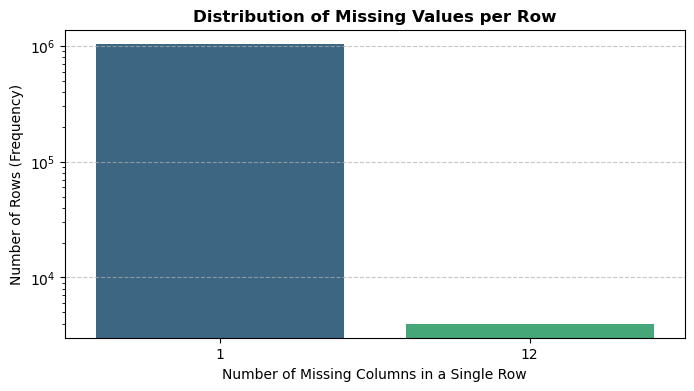

360841    12
372070    12
372075    12
372080    12
372083    12
dtype: int64


In [8]:
# 1.4 
# b. Checking missing values horizontally (per row) is crucial for identifying "junk" entries where a record might exist but contains almost no data.

# Calculate nulls per row
row_null_counts = df.isnull().sum(axis=1)


# Visualize the distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=row_null_counts, palette='viridis')

plt.title('Distribution of Missing Values per Row', fontweight='bold')
plt.xlabel('Number of Missing Columns in a Single Row')
plt.ylabel('Number of Rows (Frequency)')
plt.yscale('log') # Use log scale if most rows have 0 nulls to see the 'dirty' rows better
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# To see the top 5 rows with the most missing values
print(row_null_counts.sort_values(ascending=False).head())

**Observation:** The consistent pattern of missing values suggests a potential issue within the data pipeline. Further validation of the data source is recommended to identify possible scraping errors or schema inconsistencies. 

**Actions need to be taken:** 
4. If there are no pipeline issue, to remove fields and entries (per row) with a high percentage of missing values, and impute missing values for fields with a low percentage of missing data, using appropriate methods based on the data type and context.

**Summary of Actions need to be taken:**

1. Convert the average_salary data type from float64 to int64 to optimize memory usage and improve processing efficiency.

2. Convert metadata_expiryDate, metadata_newPostingDate, and metadata_originalPostingDate to the appropriate datetime format to enable accurate time-based analysis.

3. Transform the categories field from semi-structured JSON into a structured tabular schema for better analysis and reporting.

4. Remove fields and rows with a high percentage of missing values, and apply appropriate imputation methods to columns with a low percentage of missing data based on their data type and context.

5. Remove duplicate entries form the DataFrame.

**Activity 2:** Data Cleaning and Feature Engineering Enhancing data relevance and structure, enabling focused analysis on key job indicators and application conversion factors.

In [9]:
# 2.1 Convert the average_salary data type from float64 to int64 to optimize memory usage and improve processing efficiency.
df['average_salary'] = df['average_salary'].astype('int64')
df['average_salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1048585 entries, 0 to 1048584
Series name: average_salary
Non-Null Count    Dtype
--------------    -----
1048585 non-null  int64
dtypes: int64(1)
memory usage: 8.0 MB


In [10]:
# 2.2 Convert the 'date' column to the datetime data type.
df['metadata_expiryDate']=pd.to_datetime(df['metadata_expiryDate'], format='%Y-%m-%d')
df['metadata_newPostingDate']=pd.to_datetime(df['metadata_newPostingDate'], format='%Y-%m-%d')
df['metadata_originalPostingDate']=pd.to_datetime(df['metadata_originalPostingDate'], format='%Y-%m-%d')
df[['metadata_expiryDate', 'metadata_newPostingDate', 'metadata_originalPostingDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048585 entries, 0 to 1048584
Data columns (total 3 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   metadata_expiryDate           1044597 non-null  datetime64[ns]
 1   metadata_newPostingDate       1044597 non-null  datetime64[ns]
 2   metadata_originalPostingDate  1044597 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 24.0 MB


In [11]:
# 2.3 Handle missing values 

# a. by dropping rows with a high number of nulls (e.g., 12 or more out of 22 columns). 
# To drop rows with 12 or more (out of 22) MISSING (null) values:
df_cleaned = df[df.isnull().sum(axis=1) < 12].copy()

# Display the shape before and after
print("Before:", df.shape)
print("After removing rows with >12 missing values:", df_cleaned.shape)

Before: (1048585, 22)
After removing rows with >12 missing values: (1044597, 22)


In [12]:
# 2.3 Handle missing values 
# b. Remove the columns with more than 90% of missing values.

# Calculate the percentage of missing values in each column
missing_percentage = df_cleaned.isnull().mean() * 100

# Filter columns with less than or equal to 90% missing values
df_cleaned = df_cleaned.loc[:, missing_percentage <= 90].copy()

# Display the shape before and after
print("Before:", df.shape)
print("After removing columns with >90% missing values:", df_cleaned.shape)

Before: (1048585, 22)
After removing columns with >90% missing values: (1044597, 21)


In [13]:
# 2.3 
# After removing rows with missing values, calculate the total number of missing values in each column.
df_cleaned.isnull().sum()

categories                            0
employmentTypes                       0
metadata_expiryDate                   0
metadata_isPostedOnBehalf             0
metadata_jobPostId                    0
metadata_newPostingDate               0
metadata_originalPostingDate          0
metadata_repostCount                  0
metadata_totalNumberJobApplication    0
metadata_totalNumberOfView            0
minimumYearsExperience                0
numberOfVacancies                     0
positionLevels                        0
postedCompany_name                    0
salary_maximum                        0
salary_minimum                        0
salary_type                           0
status_id                             0
status_jobStatus                      0
title                                 0
average_salary                        0
dtype: int64

**Observation:** As a result of dropping rows with >12 missing values and columns with >90% missing values, 
we have reduced the dataset from 1,048,585 rows and 22 columns to 1,044,585 rows and 21 columns. 
There are no missing values left in the dataset. This indicates that the data cleaning process helped
improve the quality of our analysis while retaining most of the useful information.

In [14]:
""" 
There are no missing values left in the dataset so that there is no need to impute missing values in the dataset columns. 

# 1.2.3 Handle missing values 
# c. Impute missing values in the dataset columns
# Separate numeric and categorical columns
numeric_cols = df_cleaned.select_dtypes(include='number').columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns
print(numeric_cols)
print(categorical_cols)

# Impute numeric columns with mean and categorical columns with mode
for col in numeric_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

df_cleaned.isnull().sum()

for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
df_cleaned.isnull().sum()
df_cleaned.info()
"""

" \nThere are no missing values left in the dataset so that there is no need to impute missing values in the dataset columns. \n\n# 1.2.3 Handle missing values \n# c. Impute missing values in the dataset columns\n# Separate numeric and categorical columns\nnumeric_cols = df_cleaned.select_dtypes(include='number').columns\ncategorical_cols = df_cleaned.select_dtypes(include='object').columns\nprint(numeric_cols)\nprint(categorical_cols)\n\n# Impute numeric columns with mean and categorical columns with mode\nfor col in numeric_cols:\n    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())\n\ndf_cleaned.isnull().sum()\n\nfor col in categorical_cols:\n    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])\ndf_cleaned.isnull().sum()\ndf_cleaned.info()\n"

In [15]:
#2.4 Extract and flatten the 'categories' JSON data, and convert this semi-struction Json data into a structured tabular schema.

import json

# a. Observe the structure of the 'categories' column
df['categories'].head(20)

0     [{"id":13,"category":"Environment / Health"},{...
1       [{"id":21,"category":"Information Technology"}]
2       [{"id":33,"category":"Repair and Maintenance"}]
3       [{"id":21,"category":"Information Technology"}]
4           [{"id":2,"category":"Admin / Secretarial"}]
5     [{"id":7,"category":"Consulting"},{"id":21,"ca...
6       [{"id":21,"category":"Information Technology"}]
7     [{"id":37,"category":"Security and Investigati...
8     [{"id":1,"category":"Accounting / Auditing / T...
9     [{"id":7,"category":"Consulting"},{"id":14,"ca...
10    [{"id":11,"category":"Engineering"},{"id":21,"...
11                         [{"id":15,"category":"F&B"}]
12    [{"id":1,"category":"Accounting / Auditing / T...
13      [{"id":21,"category":"Information Technology"}]
14    [{"id":13,"category":"Environment / Health"},{...
15          [{"id":39,"category":"Telecommunications"}]
16          [{"id":39,"category":"Telecommunications"}]
17          [{"id":39,"category":"Telecommunicat

In [16]:
df['categories'][0]

'[{"id":13,"category":"Environment / Health"},{"id":25,"category":"Manufacturing"},{"id":36,"category":"Sciences / Laboratory / R&D"}]'

In [17]:
# 1.2.4
# b. Function to extract category texts from JSON string
def to_category_text(s):
    if not s:
        return ""
    try:
        return " | ".join(d["category"] for d in json.loads(s))
    except Exception:
        return ""

df_cleaned["category_text"] = df_cleaned["categories"].apply(to_category_text)


In [18]:
# 2.4 
# c. Handle missing values and potential errors in one step
df_cleaned["category_text"] = (
    df_cleaned["categories"]
      .fillna("[]")  # handle missing
      .apply(lambda s: " | ".join(d["category"] for d in json.loads(s)))
)

In [19]:
# 2.4 
# d. to review the new column
df_cleaned["category_text"]

0          Environment / Health | Manufacturing | Science...
1                                     Information Technology
2                                     Repair and Maintenance
3                                     Information Technology
4                                        Admin / Secretarial
                                 ...                        
1048580    Architecture / Interior Design | Building and ...
1048581    General Management | Professional Services | S...
1048582    Admin / Secretarial | Customer Service | Hospi...
1048583    Admin / Secretarial | Building and Constructio...
1048584    Admin / Secretarial | Customer Service | Hospi...
Name: category_text, Length: 1044597, dtype: object

In [20]:
# 2.4 
# e. Identify and list all distinct categories present in category_text.
distinct_categories = sorted(
    df_cleaned["category_text"]
      .fillna("")
      .str.split(" \\| ")   # split into list
      .explode()            # one category per row
      .loc[lambda x: x != ""]
      .unique()
)
distinct_categories

['Accounting / Auditing / Taxation',
 'Admin / Secretarial',
 'Advertising / Media',
 'Architecture / Interior Design',
 'Banking and Finance',
 'Building and Construction',
 'Consulting',
 'Customer Service',
 'Design',
 'Education and Training',
 'Engineering',
 'Entertainment',
 'Environment / Health',
 'Events / Promotions',
 'F&B',
 'General Management',
 'General Work',
 'Healthcare / Pharmaceutical',
 'Hospitality',
 'Human Resources',
 'Information Technology',
 'Insurance',
 'Legal',
 'Logistics / Supply Chain',
 'Manufacturing',
 'Marketing / Public Relations',
 'Medical / Therapy Services',
 'Others',
 'Personal Care / Beauty',
 'Precision Engineering',
 'Professional Services',
 'Public / Civil Service',
 'Purchasing / Merchandising',
 'Real Estate / Property Management',
 'Repair and Maintenance',
 'Risk Management',
 'Sales / Retail',
 'Sciences / Laboratory / R&D',
 'Security and Investigation',
 'Social Services',
 'Telecommunications',
 'Travel / Tourism',
 'Wholesale 

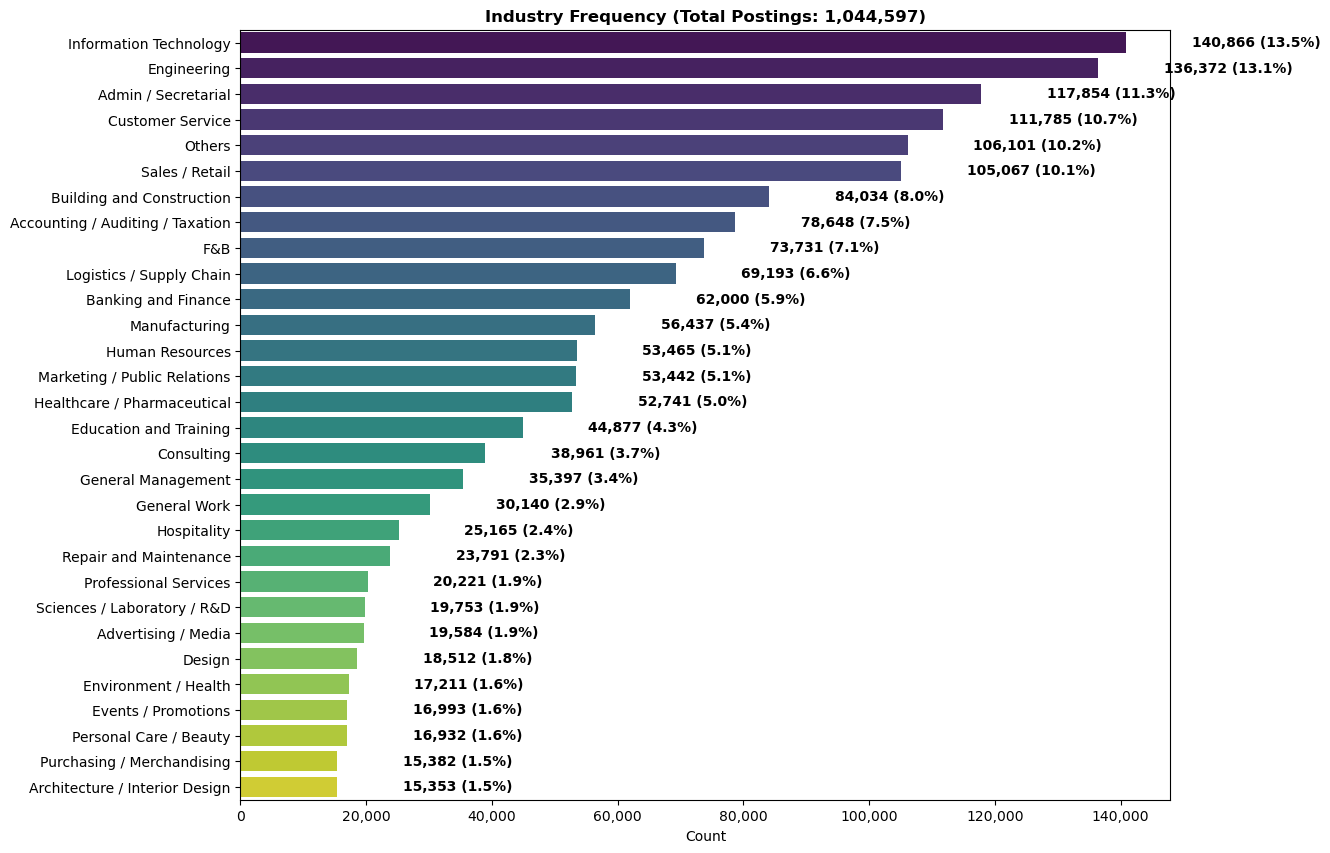

In [21]:
# 2.4
# f. To calculate the frequency distribution relative to the total number of job postings ($N = 1,048,585$).
# 1. Explode the categories to get individual industry counts
exploded_cats = df_cleaned['category_text'].str.split('|').explode().str.strip()
category_counts = exploded_cats.value_counts()

# 2. Calculate percentages based on the total number of UNIQUE job postings (rows)
total_postings = len(df_cleaned)
category_dist = pd.DataFrame({
    'Count': category_counts,
    'Percentage': (category_counts / total_postings) * 100
})

# 3. Visualization with Thousands Formatting
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=category_dist['Count'].head(30), y=category_dist.index[:30], palette='viridis')

# Format X-axis with thousands separators
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add Data Labels (Count + %)
for i, p in enumerate(ax.patches):
    width = p.get_width()
    pct = category_dist.iloc[i]['Percentage']
    plt.text(width + (total_postings * 0.01), p.get_y() + p.get_height()/2, 
             f'{int(width):,} ({pct:.1f}%)', va='center', fontweight='bold')

plt.title(f'Industry Frequency (Total Postings: {total_postings:,})', fontweight='bold')
plt.show()

In [22]:
# 2.4
# g. Finally, drop the original 'categories' column as it's no longer needed.
df_cleaned = df_cleaned.drop(columns=["categories"])


In [23]:
# 2.5. Remove duplicate rows from the DataFrame.
df_cleaned=df_cleaned.drop_duplicates()
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044597 entries, 0 to 1048584
Data columns (total 21 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   employmentTypes                     1044597 non-null  object        
 1   metadata_expiryDate                 1044597 non-null  datetime64[ns]
 2   metadata_isPostedOnBehalf           1044597 non-null  bool          
 3   metadata_jobPostId                  1044597 non-null  object        
 4   metadata_newPostingDate             1044597 non-null  datetime64[ns]
 5   metadata_originalPostingDate        1044597 non-null  datetime64[ns]
 6   metadata_repostCount                1044597 non-null  int64         
 7   metadata_totalNumberJobApplication  1044597 non-null  int64         
 8   metadata_totalNumberOfView          1044597 non-null  int64         
 9   minimumYearsExperience              1044597 non-null  int64         

**Observation:** After removing duplicate rows from the DataFrame, records remain 1,044,598.There is no duplicated entries.

In [24]:
# 2.6 Check logical issues to ensure Data Consistency
# Logical validation rules were applied to identify and rectify inconsistent or contradictory responses within the dataset. These checks ensured alignment between related variables and improved overall data quality.
# a. check minimum salary should not be greater than maximum salary
df_cleaned[df_cleaned["salary_minimum"] > df_cleaned["salary_maximum"]]

,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,minimumYearsExperience,...,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title,average_salary,category_text


In [25]:
# b. check average salary should be between minimum and maximum salary
#  1. Calculate the Midpoint for every individual row
df_cleaned['midpoint_salary'] = (df_cleaned['salary_maximum'] + df_cleaned['salary_minimum']) / 2

# 2. Identify "Suspicious" spreads (where range is wider than the average salary)
# This usually indicates data entry errors in job portals.
suspicious_data = df_cleaned[df_cleaned["midpoint_salary"] != df_cleaned["average_salary"]]
print(f"Number of suspicious entries: {len(suspicious_data)}")


Number of suspicious entries: 6397


**Observation:** The average salary falls within the expected range defined by the minimum and maximum salary values, indicating internal consistency in the salary data.

In [26]:
#2.7 Check the logical consistency of the date columns to ensure that the 'metadata_newPostingDate' is not earlier than the 'metadata_originalPostingDate', and that the 'metadata_expiryDate' is not earlier than either of the posting dates.
# 1. Check if 'metadata_newPostingDate' is earlier than 'metadata_originalPostingDate'
inconsistent_new_posting = df_cleaned[df_cleaned['metadata_newPostingDate'] < df_cleaned['metadata_originalPostingDate']]
print(f"Number of entries where new posting date is earlier than original posting date: {len(inconsistent_new_posting)}")           

Number of entries where new posting date is earlier than original posting date: 0


In [27]:
#2.7
# 2. Check if 'metadata_expiryDate' is earlier than 'metadata_newPostingDate' or 'metadata_originalPostingDate'
inconsistent_expiry = df_cleaned[(df_cleaned['metadata_expiryDate'] < df_cleaned['metadata_newPostingDate']) |
                                (df_cleaned['metadata_expiryDate'] < df_cleaned['metadata_originalPostingDate'])]
print(f"Number of entries where expiry date is earlier than posting dates: {len(inconsistent_expiry)}")         

Number of entries where expiry date is earlier than posting dates: 0


**Observation:** 
There are zero entries where the new posting date is earlier than the original posting date, and zero entries where the expiry date is earlier than the posting dates.

This indicates that the expiry date, new posting date, and original posting date fields are logically consistent, and no further data cleaning is required for these date variables.

In [28]:
# 2.8 Create new features if needed (e.g., extract year and month from the 'date' column).
df_cleaned['newPosting_year'] = df_cleaned['metadata_newPostingDate'].dt.year
df_cleaned['newPosting_month'] = df_cleaned['metadata_newPostingDate'].dt.month
df_cleaned['newPosting_weekday'] = df_cleaned['metadata_newPostingDate'].dt.weekday
df_cleaned['originalPosting_month'] = df_cleaned['metadata_originalPostingDate'].dt.month
df_cleaned['originalPosting_weekday'] = df_cleaned['metadata_originalPostingDate'].dt.weekday
df_cleaned['expiry_month'] = df_cleaned['metadata_expiryDate'].dt.month
df_cleaned['expiry_weekday'] = df_cleaned['metadata_expiryDate'].dt.weekday
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044597 entries, 0 to 1048584
Data columns (total 29 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   employmentTypes                     1044597 non-null  object        
 1   metadata_expiryDate                 1044597 non-null  datetime64[ns]
 2   metadata_isPostedOnBehalf           1044597 non-null  bool          
 3   metadata_jobPostId                  1044597 non-null  object        
 4   metadata_newPostingDate             1044597 non-null  datetime64[ns]
 5   metadata_originalPostingDate        1044597 non-null  datetime64[ns]
 6   metadata_repostCount                1044597 non-null  int64         
 7   metadata_totalNumberJobApplication  1044597 non-null  int64         
 8   metadata_totalNumberOfView          1044597 non-null  int64         
 9   minimumYearsExperience              1044597 non-null  int64         

In [29]:
# 2.9 Save the cleaned DataFrame to a new CSV file for building a dashboard visualization using streamlit.
df_cleaned.to_csv("cleaned_data.csv", index=False)

The file size is too big and can't push to github for dashboard so drop off fileds which will not be used in dashboard. 

In [30]:
# 2.10
# 1. Load your dataset
df = pd.read_csv('cleaned_data.csv')

# 2. Calculate the midpoint
halfway_point = len(df) // 2

# 3. Slice the data (from the start to the midpoint)
first_half = df.iloc[:halfway_point]
first_half.info()

# 4. Save to a new file
first_half.to_csv('first_half_dataset.csv', index=False)

print(f"Saved {len(first_half)} rows to 'first_half_dataset.csv'")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522298 entries, 0 to 522297
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   employmentTypes                     522298 non-null  object 
 1   metadata_expiryDate                 522298 non-null  object 
 2   metadata_isPostedOnBehalf           522298 non-null  bool   
 3   metadata_jobPostId                  522298 non-null  object 
 4   metadata_newPostingDate             522298 non-null  object 
 5   metadata_originalPostingDate        522298 non-null  object 
 6   metadata_repostCount                522298 non-null  int64  
 7   metadata_totalNumberJobApplication  522298 non-null  int64  
 8   metadata_totalNumberOfView          522298 non-null  int64  
 9   minimumYearsExperience              522298 non-null  int64  
 10  numberOfVacancies                   522298 non-null  int64  
 11  positionLevels            

**Activities 3:** Exploratory Data Analysis (EDA) highlights: Job Market Overview to discovery the key patterns or anomalies that shaped the dashboard design.

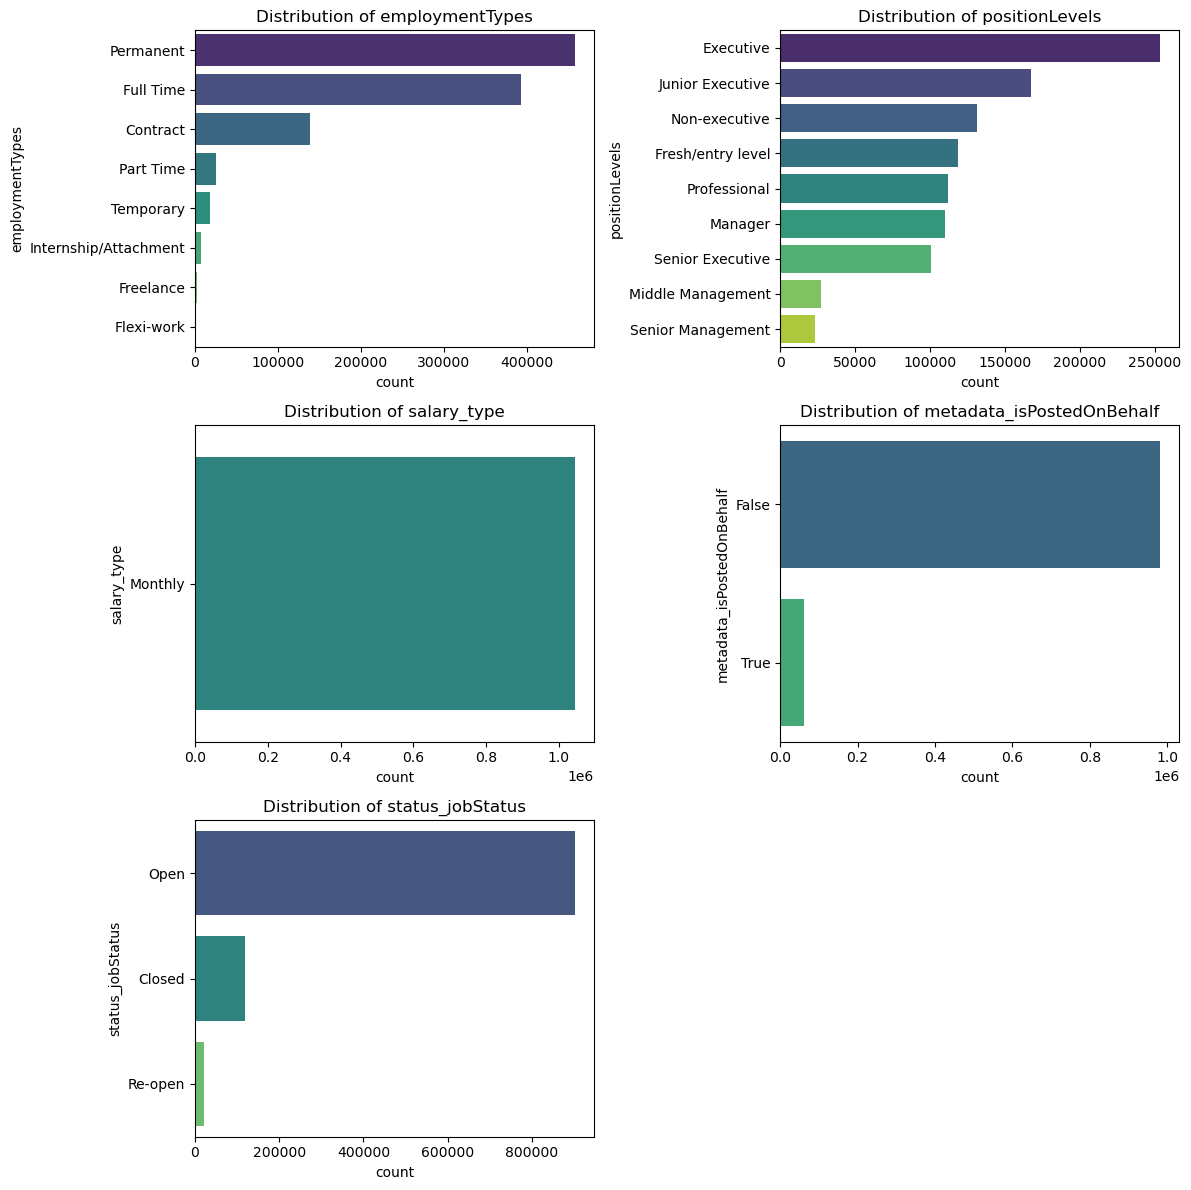

In [31]:
# 3.1. Create a subsplot Grid to show the distribution of various object types in the dataset.

# 3.1.1. Categorical/Bool: Frequency distribution
cat_cols = ['employmentTypes', 'positionLevels', 'salary_type', 'metadata_isPostedOnBehalf', 'status_jobStatus']
plt.figure(figsize=(12, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df_cleaned, y=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('categorical_analysis.png')


**Data Preparation and Analytical Considerations**

1. Employment Type Consolidation
Due to the small sample sizes observed in the Temporary, Internship/Attachment, Freelance, and Flexi-work categories, these employment types were consolidated into a single category (Temporary/Freelance) to ensure sufficient sample size and analytical robustness for subgroup analysis.

2. Salary Type Assessment
All reported salaries were paid on a monthly basis. As there was no variation in salary type, no further subgroup analysis by salary payment structure was conducted.

3. Jobs Posted on Behalf of Employers
A proportion of job postings were submitted on behalf of employers. Where relevant, drill-down analysis may be performed to examine detailed job characteristics and assess any potential differences compared to directly posted roles.

4. Reposted (Re-opened) Jobs
A subset of job postings were identified as reposted or re-opened positions. Additional drill-down analysis may be conducted to investigate potential underlying factors, including possible challenges in fulfilling hiring demand or mismatches within the job market.

**Action need to be taken:**
1. Under Employment Type, the categories Temporary, Internship/Attachment, Freelance, and Flexi-work will be consolidated into one unified category: Temporary/Freelance, to simplify analysis and improve interpretability.

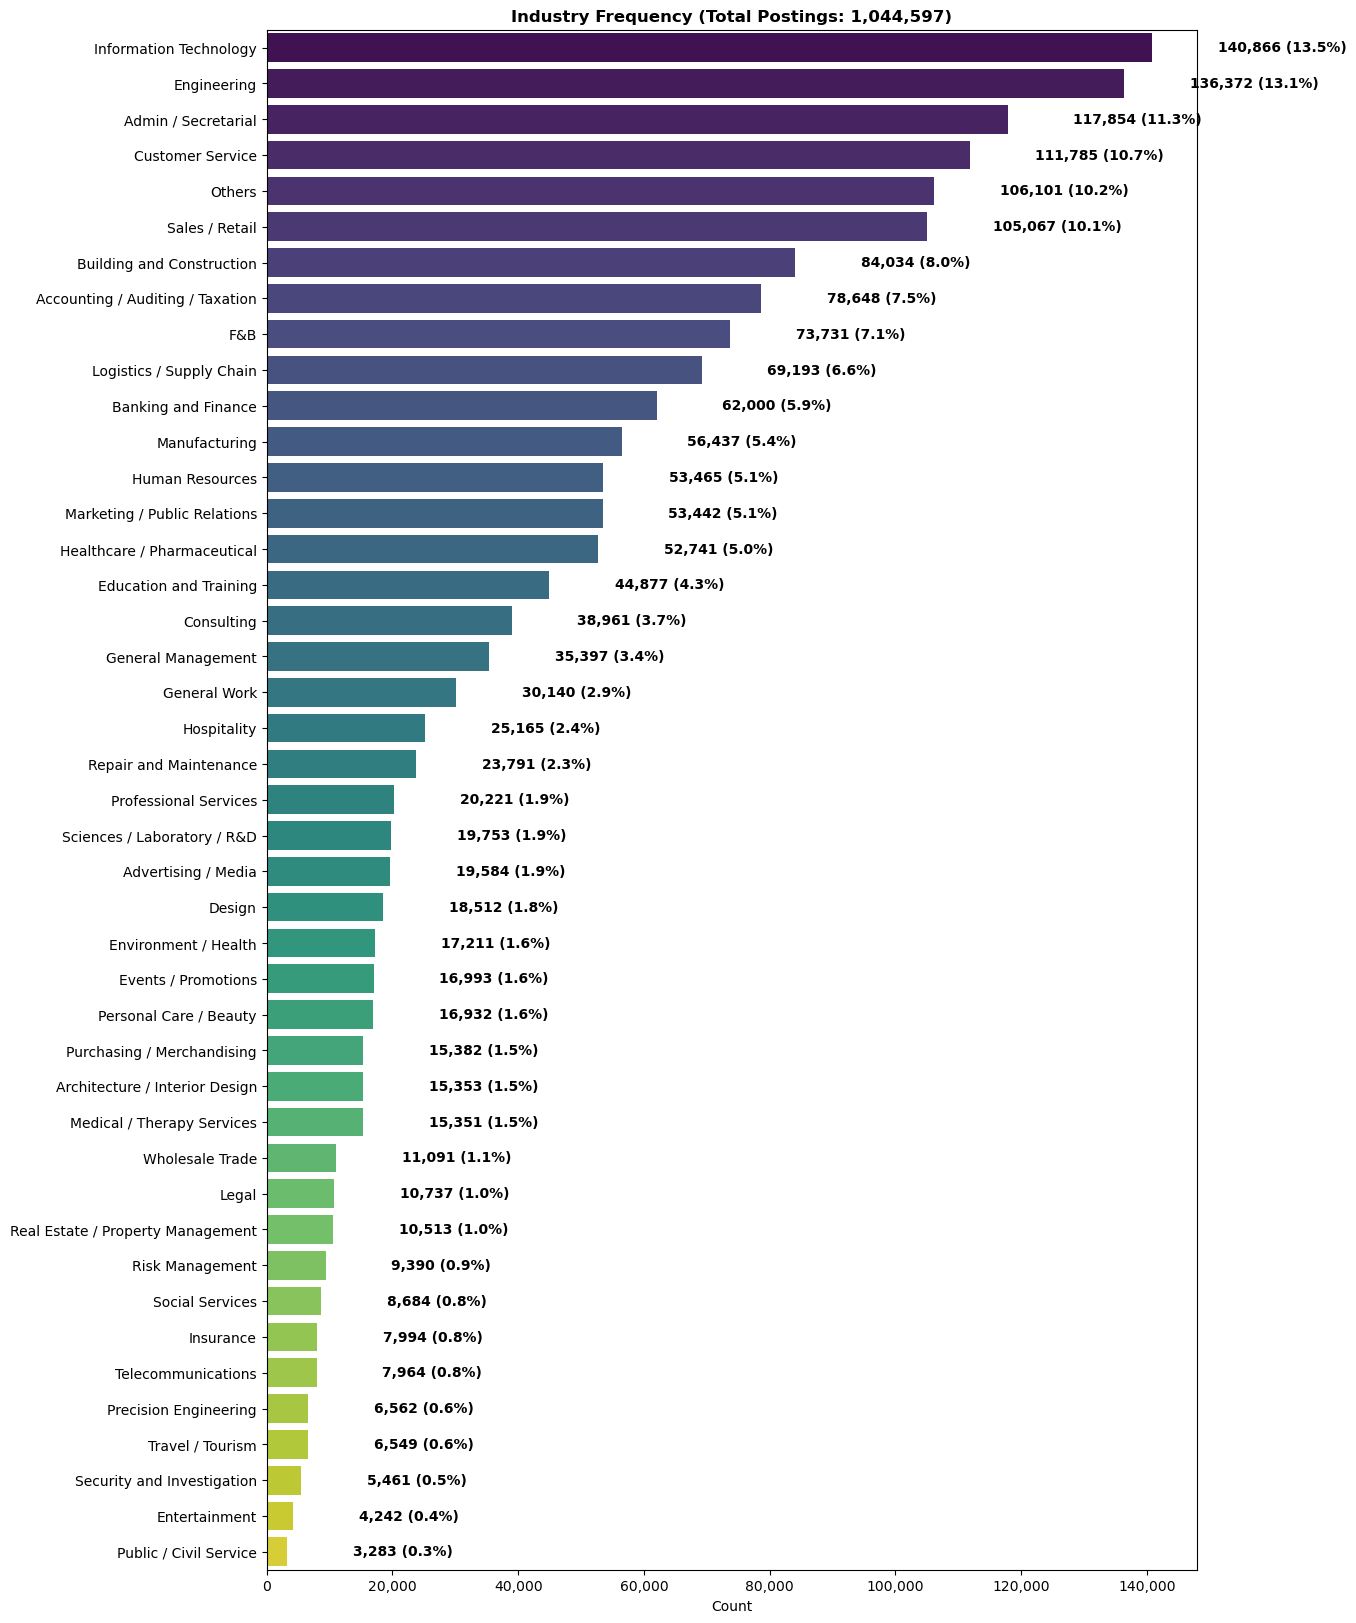

In [32]:
# 3.1.2 Get top 50 job categories (so highest is at the top)
# To calculate the frequency distribution relative to the total number of job postings ($N = 1,048,585$).
# 1. Explode the categories to get individual industry counts
exploded_cats = df_cleaned['category_text'].str.split('|').explode().str.strip()
category_counts = exploded_cats.value_counts()

# 2. Calculate percentages based on the total number of UNIQUE job postings (rows)
total_postings = len(df_cleaned)
category_dist = pd.DataFrame({
    'Count': category_counts,
    'Percentage': (category_counts / total_postings) * 100
})

# 3. Visualization with Thousands Formatting
plt.figure(figsize=(12, 20))
ax = sns.barplot(x=category_dist['Count'].head(50), y=category_dist.index[:50], palette='viridis')

# Format X-axis with thousands separators
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add Data Labels (Count + %)
for i, p in enumerate(ax.patches):
    width = p.get_width()
    pct = category_dist.iloc[i]['Percentage']
    plt.text(width + (total_postings * 0.01), p.get_y() + p.get_height()/2, 
             f'{int(width):,} ({pct:.1f}%)', va='center', fontweight='bold')

plt.title(f'Industry Frequency (Total Postings: {total_postings:,})', fontweight='bold')
plt.show()

**Data Preparation and Analytical Considerations** 

The top five job categories — Information Technology, Engineering, Administration/Secretarial, customer service and sales/retails — reflect sustained hiring demand in these sectors. This underscores the need to ensure sufficient workforce supply, particularly in technical domains, to support market requirements.

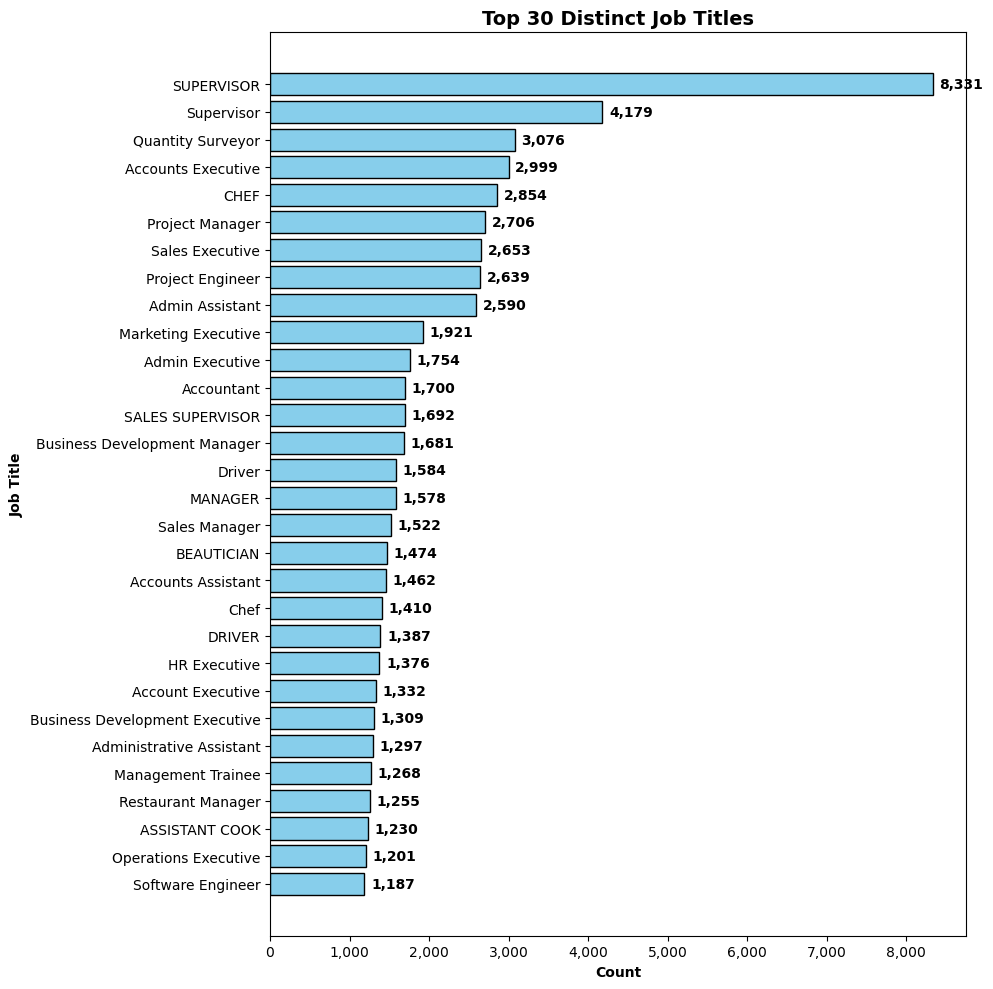

In [33]:
# 3.1.3 Get top 30 job title(so highest is at the top)
from matplotlib import ticker

top_30_title = df_cleaned['title'].value_counts().head(30).iloc[::-1]

plt.figure(figsize=(10, 10))

# 2. Use barh for horizontal orientation
# Y is the category name, Width (X) is the count
plt.barh(top_30_title.index, top_30_title.values, color='skyblue', edgecolor='black')

# 3. Apply Thousands Formatting to the X-Axis
# This changes '10000' to '10,000' on the bottom scale
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 4. Labeling: X is now the Count
plt.title('Top 30 Distinct Job Titles', fontweight='bold', fontsize=14)
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Job Title', fontweight='bold')

# 5. Add data labels to the end of each bar for immediate reading
# We iterate through the values and format each one with a comma for thousands
for i, v in enumerate(top_30_title.values):
    plt.text(v + (max(top_30_title.values) * 0.01), i, 
             f'{v:,}', # This is the thousands formatter
             color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


**Data Preparation and Analytical Considerations** 
Since the top two most frequent job titles are “Supervisor,” a broad and generic role, it is necessary to analyze job titles in conjunction with job categories to obtain more specific and actionable insights.

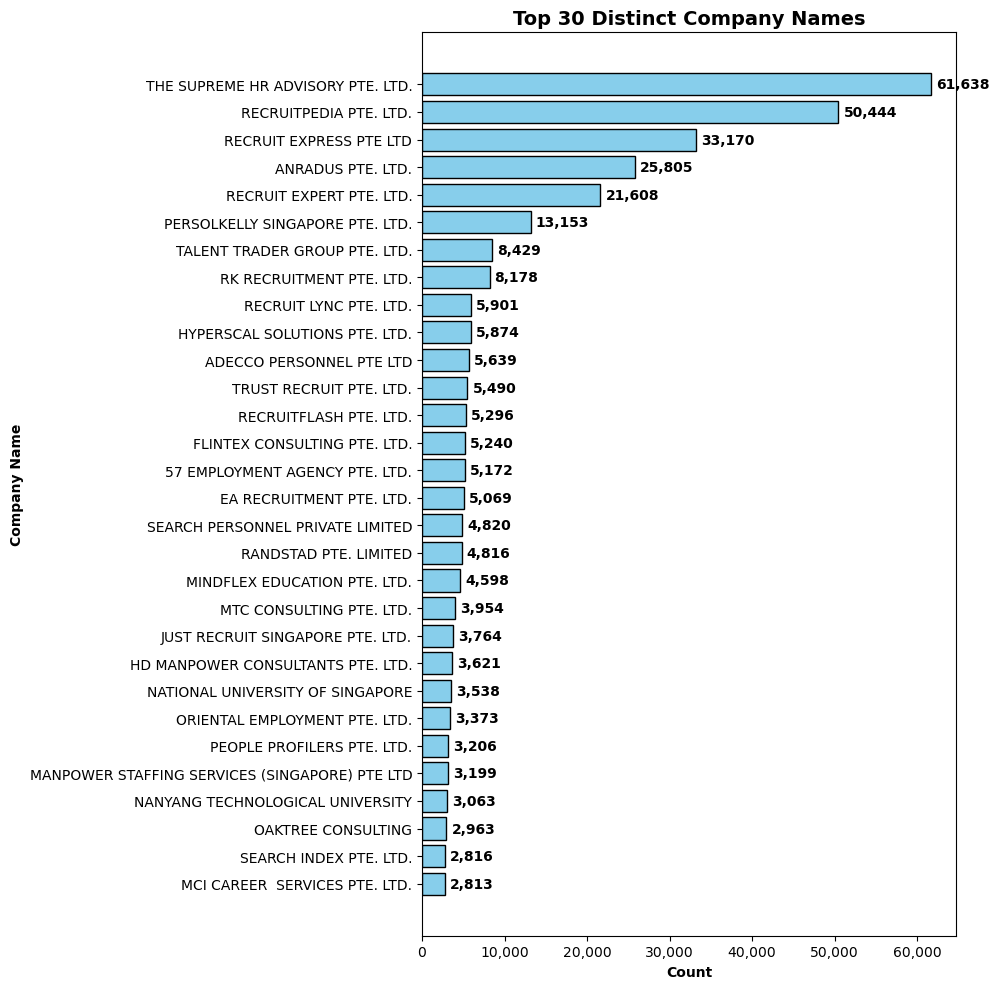

In [34]:
# 3.1.4 Get top 30 company name Which posted most jobs? (so highest is at the top)
from matplotlib import ticker

top_30_companies = df_cleaned['postedCompany_name'].value_counts().head(30).iloc[::-1]

plt.figure(figsize=(10, 10))

# 2. Use barh for horizontal orientation
# Y is the category name, Width (X) is the count
plt.barh(top_30_companies.index, top_30_companies.values, color='skyblue', edgecolor='black')

# 3. Apply Thousands Formatting to the X-Axis
# This changes '10000' to '10,000' on the bottom scale
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 4. Labeling: X is now the Count
plt.title('Top 30 Distinct Company Names', fontweight='bold', fontsize=14)
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Company Name', fontweight='bold')

# 5. Add data labels to the end of each bar for immediate reading
# We iterate through the values and format each one with a comma for thousands
for i, v in enumerate(top_30_companies.values):
    plt.text(v + (max(top_30_companies.values) * 0.01), i, 
             f'{v:,}', # This is the thousands formatter
             color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


**Data Preparation and Analytical Considerations** 

The top 15 company names are predominantly recruitment agencies. This suggests that recruitment agencies play a significant role in job postings and may serve as key intermediaries for job seekers.

In [35]:
# 3.2 Discrete Numerical Analysis - to identify density and common requirements using 
# a. describe() to get a quick overview of the central tendency, dispersion, and shape of the distribution of numerical features. This helps identify if there are any anomalies or outliers that need to be addressed before building the dashboard.
df_cleaned.describe()

,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,minimumYearsExperience,numberOfVacancies,salary_maximum,salary_minimum,status_id,average_salary,midpoint_salary,newPosting_year,newPosting_month,newPosting_weekday,originalPosting_month,originalPosting_weekday,expiry_month,expiry_weekday
count,1.044597e+06,1.044597e+06,1.044597e+06,1.044597e+06,1.044597e+06,1.044597e+06,1.044597e+06,1044597.0,1.044597e+06,1.044597e+06,1.044597e+06,1.044597e+06,1.044597e+06,1.044597e+06,1.044597e+06,1.044597e+06,1.044597e+06
mean,5.493219e-02,2.144728e+00,2.684747e+01,2.790185e+00,2.690275e+00,5.745429e+03,3.829878e+03,0.0,4.787651e+03,4.787654e+03,2.023368e+03,6.212530e+00,2.306699e+00,6.145512e+00,2.307532e+00,6.507363e+00,3.392934e+00
std,2.827855e-01,1.064557e+01,8.276102e+01,2.536057e+00,1.126322e+01,5.027833e+04,3.169443e+03,0.0,2.552497e+04,2.552497e+04,4.822166e-01,3.228260e+00,1.665720e+00,3.276703e+00,1.663086e+00,3.201907e+00,1.784882e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,2.023000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.300000e+03,2.500000e+03,0.0,2.900000e+03,2.900000e+03,2.023000e+03,4.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,2.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,4.500000e+03,3.000000e+03,0.0,3.800000e+03,3.800000e+03,2.023000e+03,6.000000e+00,2.000000e+00,6.000000e+00,2.000000e+00,6.000000e+00,3.000000e+00
75%,0.000000e+00,1.000000e+00,1.700000e+01,4.000000e+00,2.000000e+00,6.500000e+03,4.500000e+03,0.0,5.500000e+03,5.500000e+03,2.024000e+03,9.000000e+00,4.000000e+00,9.000000e+00,4.000000e+00,9.000000e+00,5.000000e+00
max,2.000000e+00,1.342000e+03,8.190000e+03,8.800000e+01,9.990000e+02,2.533000e+07,3.500000e+05,0.0,1.266640e+07,1.266640e+07,2.024000e+03,1.200000e+01,6.000000e+00,1.200000e+01,6.000000e+00,1.200000e+01,6.000000e+00


**Observation:**
Some columns exhibit extremely high maximum values compared to their mean and 75th percentile, suggesting the presence of outliers (e.g., 25 million max salary), erroneous values or placeholders (e.g., 999 vacancies, 88 years of experience), or high-demand postings (e.g., 1,342 job applications, 8,190 views). 

Further investigation is needed to validate these cases and determine appropriate handling strategies, such as removal, imputation, or separate treatment for exceptional “hot” postings.


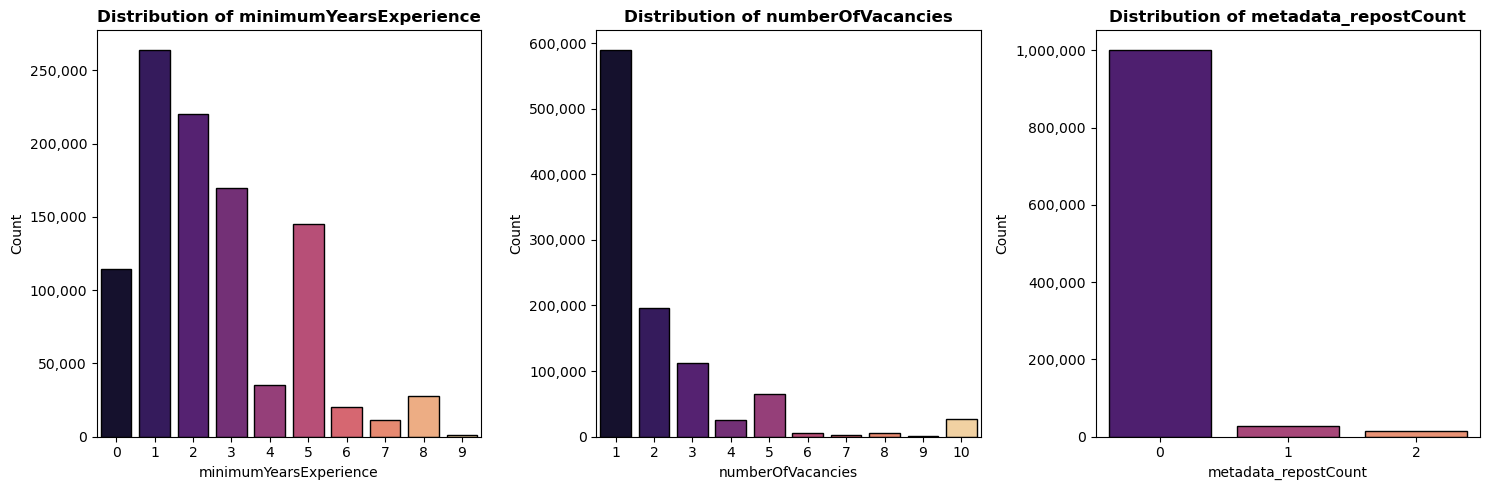

In [36]:
# 3.2.1 Discrete Numerical Analysis - to identify density and common requirements using 
# b. Columns to visualize a countplot or a specialized histogram
discrete_cols = ['minimumYearsExperience', 'numberOfVacancies', 'metadata_repostCount']

plt.figure(figsize=(15, 5))

for i, col in enumerate(discrete_cols, 1):
    plt.subplot(1, 3, i)
    
    # Calculate value counts for sorting or display
    counts = df_cleaned[col].value_counts().sort_index().head(10) # head(10) to avoid long tails
    
    sns.barplot(x=counts.index, y=counts.values, palette='magma', edgecolor='black')
    
    # Thousands formatting for Y-axis
    plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Data Preparation and Analytical Considerations** 

Given the positive skewness observed in the distributions of minimum years of experience and number of vacancies, these variables may be categorised into meaningful bands to reduce the influence of extreme values and improve analytical stability in subgroup analysis.

**Action need to be taken:**
2. Under Minimum Years of Experience, values of 9 years and above will be grouped into a new category, “9+”, to simplify the distribution and improve interpretability.

3. Under Number of Vacancies, values of 6 and above will similarly be consolidated into a new category, “6+”, for consistency and clearer analysis.

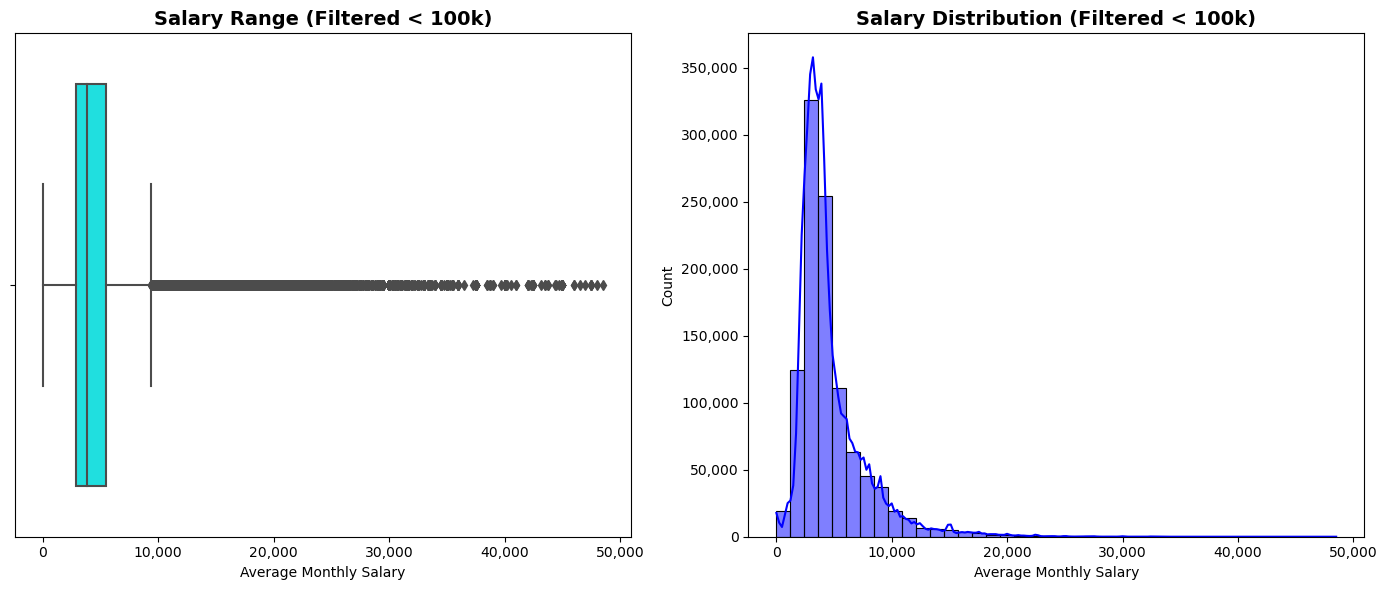

In [37]:
# 3.2.2 Numerical: Initial visualization to identify outliers and skewness
"""We look for skewness. For example, if average_salary is heavily right-skewed with a few massive outliers, 
we might implement a "Salary Range" slider in the dashboard that defaults to the 95th percentile to keep 
the view relevant for most users."""

# a. average_salary
#  1. Filtering anomalies to focus on the realistic monthly range
# We exclude everything >= 5,0000 to keep the dashboard focused on common data
df_cleaned_filtered = df_cleaned[df_cleaned['average_salary'] < 50000].copy()

plt.figure(figsize=(14, 6))

# --- Subplot 1: Boxplot (Anomaly Detection) ---
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned_filtered, x='average_salary', color='cyan')

# Thousands formatting for X-axis
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Salary Range (Filtered < 100k)', fontweight='bold', fontsize=14)
plt.xlabel('Average Monthly Salary')

# --- Subplot 2: Histogram (Distribution) ---
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned_filtered['average_salary'], bins=40, kde=True, color='blue')

# Thousands formatting for both axes
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Salary Distribution (Filtered < 100k)', fontweight='bold', fontsize=14)
plt.xlabel('Average Monthly Salary')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Data Preparation and Analytical Considerations** 

Even after restricting the analysis to salaries below 50,000, the distribution remains positively skewed, indicating the presence of a long right tail. The frequency distribution begins to flatten beyond 25,000, suggesting sparse but extreme higher-value observations that may disproportionately influence summary statistics such as the mean.

To address the long-tail effect and improve distributional stability, salary values of 25,000 and above will be consolidated into a new category, “25,000+”. These values will be imputed using the median of the 25,000-and-above group, as the median is a robust measure of central tendency that is less sensitive to extreme values.

This approach reduces skewness, mitigates the impact of outliers, and enhances interpretability while preserving meaningful salary differentiation.

**Actions:**
4. Salary values of 25,000 and above will be consolidated into a new category, “25,000+”. These values will be imputed using the median of the 25,000-and-above group.


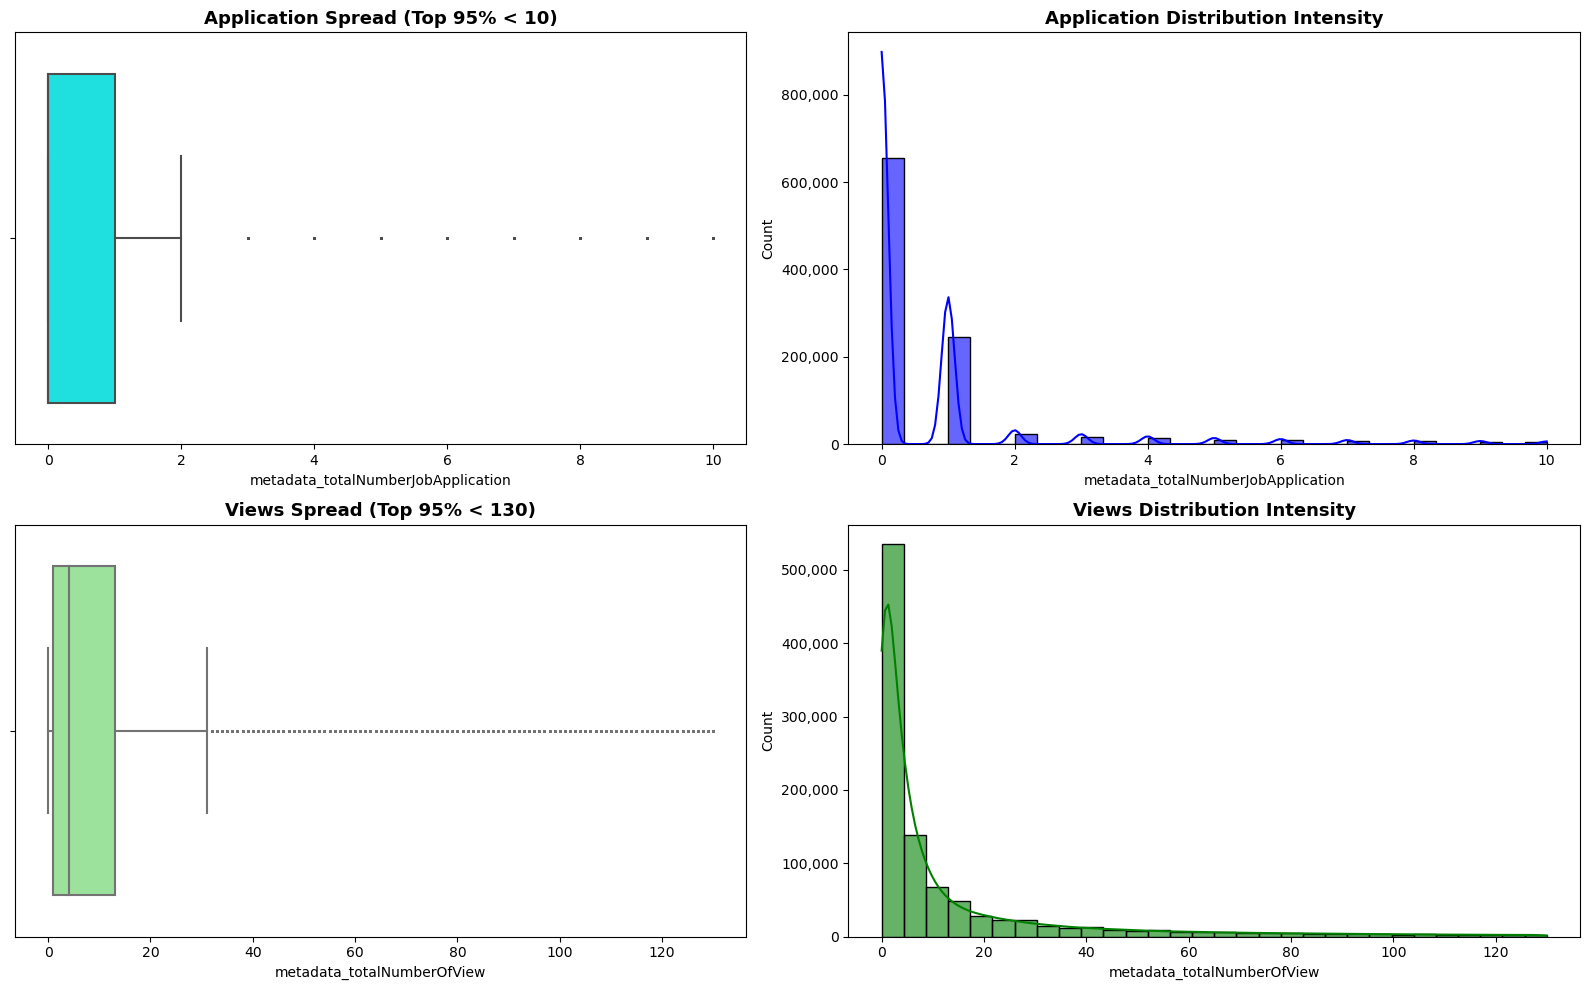

In [38]:
# 3.2.2 Numerical: Initial visualization to identify outliers and skewness
"""We look for skewness. For example, if totalNumberJobApplication is heavily right-skewed with a few massive outliers, 
we might implement a "metadata_totalNumberJobApplication" slider in the dashboard that defaults to the 95th percentile to keep 
the view relevant for most users.
To make the chart easy to view, we need to balance removing extreme noise with retaining the story of the data.

For metadata_totalNumberJobApplication, job data is almost always "Long-Tailed"—a few jobs get thousands of applications, 
while most get very few. Instead of a hard-coded filter like 500, a more adaptive "EDA-friendly" approach is to filter by 
the 95th percentile. This automatically removes the top 5% of extreme anomalies that squash your visualization.

Comparing Applications and Views (Top 95%) to provide a complete picture of the Conversion Funnel (Views → Applications)
"""

# 1. Calculate 95th percentile thresholds for both metrics
thresh_apps = df_cleaned['metadata_totalNumberJobApplication'].quantile(0.95)
thresh_views = df_cleaned['metadata_totalNumberOfView'].quantile(0.95)

# 2. Create filtered dataframes for individual distribution plots
df_apps_clean = df_cleaned[df_cleaned['metadata_totalNumberJobApplication'] <= thresh_apps].copy()
df_views_clean = df_cleaned[df_cleaned['metadata_totalNumberOfView'] <= thresh_views].copy()

plt.figure(figsize=(16, 10))

# --- Row 1: Total Job Applications ---
plt.subplot(2, 2, 1)
sns.boxplot(data=df_apps_clean, x='metadata_totalNumberJobApplication', color='cyan', fliersize=1)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title(f'Application Spread (Top 95% < {int(thresh_apps):,})', fontweight='bold', fontsize=13)

plt.subplot(2, 2, 2)
sns.histplot(df_apps_clean['metadata_totalNumberJobApplication'], bins=30, kde=True, color='blue', alpha=0.6)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Application Distribution Intensity', fontweight='bold', fontsize=13)

# --- Row 2: Total Job Views ---
plt.subplot(2, 2, 3)
sns.boxplot(data=df_views_clean, x='metadata_totalNumberOfView', color='lightgreen', fliersize=1)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title(f'Views Spread (Top 95% < {int(thresh_views):,})', fontweight='bold', fontsize=13)

plt.subplot(2, 2, 4)
sns.histplot(df_views_clean['metadata_totalNumberOfView'], bins=30, kde=True, color='green', alpha=0.6)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Views Distribution Intensity', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.show()

**Observation:**
After filtering out views below 130, the distribution remains positively skewed. 

**Actions:**
5. Application of 10 and above will be grouped as “10+” and imputed using the median to reduce the impact of outliers.
6. Views of 80 and above will be grouped as “80+” and imputed using the median to reduce the impact of outliers.

**EDA Highlights & Dashboard Impact**
1. The Funnel Anomaly: During EDA, look for jobs with High Views but Near-Zero Applications. This is a major anomaly that suggests a problem with the "Apply" button or an extremely unattractive job description. In a dashboard, this can be visualized as a "Low Conversion Alert" for recruiters.
2. Conversion Rate KPI: By having both metrics, you can calculate Conversion_Rate = (Applications / Views) * 100. The average conversion rate discovered during EDA becomes your Dashboard Benchmark (e.g., "This job is performing 5% above the market average conversion").
3. Scaling Differences: You will likely notice that metadata_totalNumberOfView is often $10x$ to $20x$ larger than metadata_totalNumberJobApplication. This discovery tells the dashboard designer that they cannot use a single axis for both metrics in a combined chart; they should use a Dual-Axis Chart or separate scales.
4. Filter Synchronization: In your dashboard, if a user filters by "High Salary," you should show how it impacts both Views and Applications. EDA often shows that high salary increases Views significantly, but might only marginally increase Applications if the requirements are too strict.

In [39]:
#3.3.4 Understanding the time dynamics of job postings
# 3. how many dates between 'metadata_originalPostingDate' and 'metadata_newPostingDate'.capitalize
# 1. Ensure columns are datetime objects
df_cleaned['metadata_originalPostingDate'] = pd.to_datetime(df_cleaned['metadata_originalPostingDate'])
df_cleaned['metadata_newPostingDate'] = pd.to_datetime(df_cleaned['metadata_newPostingDate'])

# 2. Calculate the difference in days
df_cleaned['date_diff'] = (df_cleaned['metadata_newPostingDate'] - df_cleaned['metadata_originalPostingDate']).dt.days

# 3. Filter and Count
# This counts how many jobs were "re-posted" or updated after the original date
reposted_count = len(df_cleaned[df_cleaned['date_diff'] > 0])

print(f"Number of entries with date differences: {reposted_count}")

# 4. Optional: If you want to see the average delay
avg_diff = df_cleaned['date_diff'].mean()
print(f"Average days between original and new posting: {avg_diff:.2f} days")

Number of entries with date differences: 42650
Average days between original and new posting: 2.73 days


In [40]:
#3.3.4
# 4. how many dates between 'metadata_expiryDate' and 'metadata_newPostingDate'
# 1. Ensure columns are datetime objects
df_cleaned['metadata_expiryDate'] = pd.to_datetime(df_cleaned['metadata_expiryDate'])
df_cleaned['metadata_newPostingDate'] = pd.to_datetime(df_cleaned['metadata_newPostingDate'])       
# 2. Calculate the difference in days
df_cleaned['expiry_new_diff'] = (df_cleaned['metadata_expiryDate'] - df_cleaned['metadata_newPostingDate']).dt.days     

# 3. Filter and Count
# This counts how many jobs were "re-posted" or updated after the original date
reposted_count = len(df_cleaned[df_cleaned['expiry_new_diff'] > 0])

print(f"Number of entries with date differences: {reposted_count}")

# 4. Optional: If you want to see the average delay
avg_diff = df_cleaned['expiry_new_diff'].mean()
Median_diff = df_cleaned['expiry_new_diff'].median()
print(f"Average days between expiry and new posting: {avg_diff:.2f} days")
print(f"Median days between expiry and new posting: {Median_diff:.2f} days")

Number of entries with date differences: 1044597
Average days between expiry and new posting: 25.66 days
Median days between expiry and new posting: 30.00 days


**Findings:** 
1. Approximately 4.1% of entries (42,650 out of 1,044,597) have a different new posting date compared to the original posting date, with an average difference of 2.73 days. Therefore, the new posting date will be used for subsequent subgroup analysis. If time permits, further investigation into these reposted cases may be conducted to better understand the underlying reasons.

2. The average number of days between the expiry date and the new posting date is 25.66 days, with a median of 30 days. This indicates that job postings typically remain active for approximately one month.

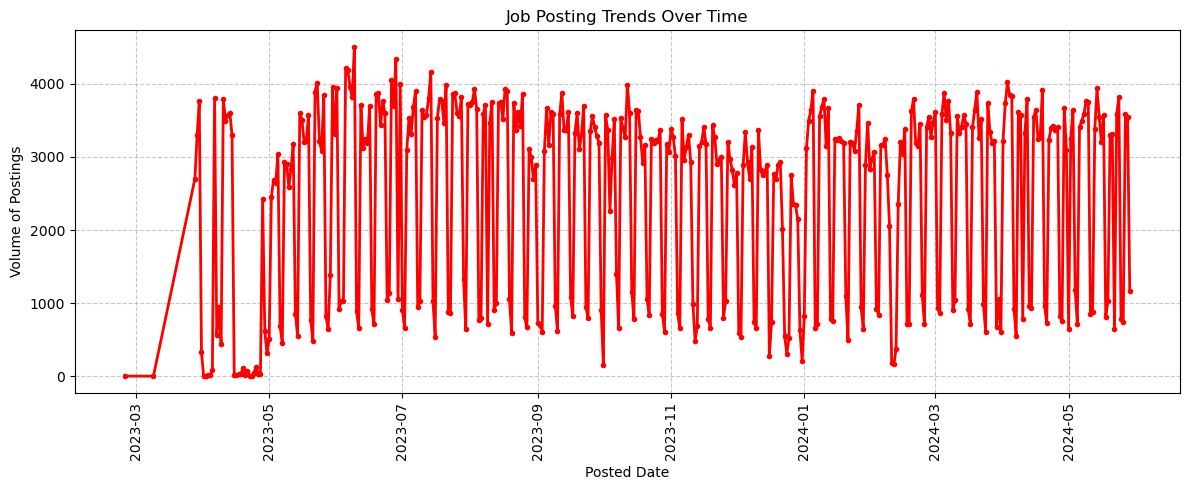

In [41]:
#3.3.4 Temporal Analysis: Timeline Trends
"""Trends over time help determine if the dashboard needs "Growth" indicators (e.g., % increase in postings from last month). 
Identifying gaps in dates helps in setting up data freshness alerts."""

# a. daily trends
df_cleaned['post_date'] = df_cleaned['metadata_newPostingDate'].dt.date
date_trends = df_cleaned.groupby('post_date').size()

plt.figure(figsize=(12, 5))
date_trends.plot(kind='line', marker='o', color='red', markersize=3, linewidth=2)
plt.title('Job Posting Trends Over Time')
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Posted Date')
plt.ylabel('Volume of Postings')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('temporal_analysis.png')

**Data Preparation and Analytical Considerations** 

Over the analysis period, daily job postings fluctuated between 500 and 3,500, indicating variability in posting activity over time.

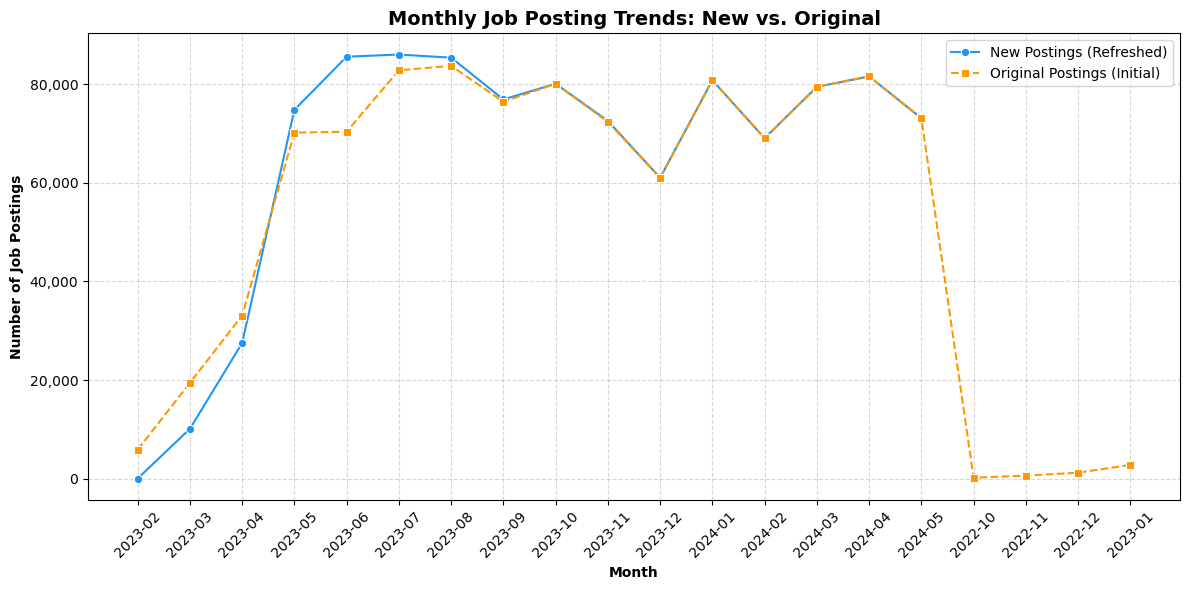

In [42]:
# 3.1.4 Job Posting Trends Over Time
# b. month trends

# 1. Prepare data for New Postings
df_cleaned['newPosting_month'] = df_cleaned['metadata_newPostingDate'].dt.to_period('M')
monthly_new = df_cleaned.groupby('newPosting_month').size()

# 2. Prepare data for Original Postings
df_cleaned['originalPosting_month'] = df_cleaned['metadata_originalPostingDate'].dt.to_period('M')
monthly_original = df_cleaned.groupby('originalPosting_month').size()

plt.figure(figsize=(12, 6))

# 3. Plotting both lines
# We convert index to string for compatible plotting with Seaborn/Matplotlib
sns.lineplot(x=monthly_new.index.astype(str), y=monthly_new.values, 
             label='New Postings (Refreshed)', marker='o', color='#2196f3')

sns.lineplot(x=monthly_original.index.astype(str), y=monthly_original.values, 
             label='Original Postings (Initial)', marker='s', color='#ff9800', linestyle='--')

# 4. Thousands formatting for Y-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 5. Dashboard Aesthetics
plt.title('Monthly Job Posting Trends: New vs. Original', fontweight='bold', fontsize=14)
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of Job Postings', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(frameon=True)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Data Preparation and Analytical Considerations** 

Over the analysis period, the highest monthly job postings were recorded between June and August 2023, with each month exceeding 85,000 postings.

In [43]:
# 3.1.5 Monthly Job Trend
df_cleaned.set_index("metadata_newPostingDate",).resample("M").size()

metadata_newPostingDate
2023-02-28        1
2023-03-31    10086
2023-04-30    27511
2023-05-31    74863
2023-06-30    85631
2023-07-31    86073
2023-08-31    85434
2023-09-30    76963
2023-10-31    80140
2023-11-30    72587
2023-12-31    61068
2024-01-31    80858
2024-02-29    69081
2024-03-31    79518
2024-04-30    81627
2024-05-31    73156
Freq: M, dtype: int64

**Summary of Actions:**

1. Under Employment Type, the categories Temporary, Internship/Attachment, Freelance, and Flexi-work will be consolidated into one unified category: Temporary/Freelance, to simplify analysis and improve interpretability.

2. Under Minimum Years of Experience, values of 9 years and above will be grouped into a new category, “9+”, to simplify the distribution and improve interpretability.

3. Under Number of Vacancies, values of 9 and above will similarly be consolidated into a new category, “9+”, for consistency and clearer analysis.

4. Salary values of 25,000 and above will be consolidated into a new category, “25,000+”. These values will be imputed using the median of the 25,000-and-above group.

5. Application of 10 and above will be grouped as “10+” and imputed using the median to reduce the impact of outliers.

6. Views of 80 and above will be grouped as “80+” and imputed using the median to reduce the impact of outliers.

In [44]:
#3.2.1 Recode employmentTypes into consolidated categories
# Using .replace for better performance/readability over .apply(lambda)
target_types = ['Temporary', 'Internship/Attachment', 'Freelance', 'Flexi-work']
df_cleaned['employmentType_category'] = df_cleaned['employmentTypes'].replace(target_types, 'Temporary/Freelance')

# Final check of the new category distribution
print(df_cleaned['employmentType_category'].value_counts())    

Permanent              458139
Full Time              393352
Contract               139182
Temporary/Freelance     28493
Part Time               25431
Name: employmentType_category, dtype: int64


In [45]:
#3.2.2 Recode Minimum Years of Experience, values of 9 years and above will be grouped into a new category, “9+”. 
# Create the '9+' category based on the minimumYearsExperience column
df_cleaned['minimumYearsExperience_category'] = df_cleaned['minimumYearsExperience'].apply(
    lambda x: '9+' if x >= 9 else str(int(x))
)

# Display the distribution
print(df_cleaned['minimumYearsExperience_category'].value_counts())

1     264085
2     219909
3     169787
5     145154
0     114451
9+     36973
4      34982
8      27443
6      20244
7      11569
Name: minimumYearsExperience_category, dtype: int64


In [46]:
# 3.2.3 Recode numberOfVacancies, values of 9 and above will be grouped into a new category, “9+”. 
# Create the '9+' category based on the numberOfVacancies column
df_cleaned['numberOfVacancies_category'] = df_cleaned['numberOfVacancies'].apply(
    lambda x: '9+' if x >= 9 else str(int(x))
)

# Display the distribution
print(df_cleaned['numberOfVacancies_category'].value_counts())

1     590242
2     195718
3     111947
5      64760
9+     44003
4      24580
8       5542
6       5456
7       2349
Name: numberOfVacancies_category, dtype: int64


In [47]:
# 3.3.4 Average Salary values of 50,000 and above will be consolidated into a new category, “50,000+”. 
# Create the '50,000+' category based on the average_salary column
df_cleaned['average_salary_category'] = df_cleaned['average_salary'].apply(
    lambda x: '50,000+' if x >= 50000 else f"{int(x):,}"
)

# Display the distribution
print(df_cleaned['average_salary_category'].value_counts())

4,000     55984
3,500     38604
3,000     37017
4,500     35564
3,750     34037
          ...  
18,040        1
15,795        1
16,225        1
3,487         1
1,135         1
Name: average_salary_category, Length: 3776, dtype: int64


In [48]:
# 3.2.5 Recode metadata_totalNumberJobApplication, values of 30 and above will be grouped into a new category, “80+”. 
# Create the '30+' category based on the totalNumberOfJobApplication column
df_cleaned['totalNumberOfJobApplication_category'] = df_cleaned['metadata_totalNumberJobApplication'].apply(
    lambda x: '30+' if x >= 30 else str(int(x))
)

# Display the distribution
print(df_cleaned['totalNumberOfJobApplication_category'].value_counts())

0      656375
1      246159
2       23284
3       16627
30+     15346
4       12949
5       10200
6        8369
7        6736
8        5981
9        5116
10       4446
11       3734
12       3314
13       2939
14       2579
15       2326
16       2196
17       2037
18       1778
19       1578
20       1418
21       1345
22       1249
23       1130
24       1066
26        962
25        939
27        864
29        785
28        770
Name: totalNumberOfJobApplication_category, dtype: int64


In [49]:
# 3.2.6 Recode metadata_totalNumberOfView, values of 80 and above will be grouped into a new category, “80+”. 
# Create the '80+' category based on the totalNumberOfView column
df_cleaned['totalNumberOfView_category'] = df_cleaned['metadata_totalNumberOfView'].apply(
    lambda x: '80+' if x >= 80 else str(int(x))
)

# Display the distribution
print(df_cleaned['totalNumberOfView_category'].value_counts())

0      179121
1      127738
2       96349
80+     87802
3       73658
        ...  
75       1108
76       1082
77       1079
79       1066
78       1034
Name: totalNumberOfView_category, Length: 81, dtype: int64


**Activities 4:** Identifying correlations between features is a critical step in deciding which "Interactivity" to build into your dashboard.

                                          employmentTypes_category_num  \
employmentTypes_category_num                                  1.000000   
metadata_repostCount                                         -0.020617   
totalNumberOfJobApplication_category_num                     -0.016990   
totalNumberOfView_category_num                                0.006097   
minimumYearsExperience_category_num                          -0.043012   
numberOfVacancies_category_num                                0.100453   
average_salary_category_num                                  -0.050715   
pos_level_num                                                -0.008721   

                                          metadata_repostCount  \
employmentTypes_category_num                         -0.020617   
metadata_repostCount                                  1.000000   
totalNumberOfJobApplication_category_num              0.295116   
totalNumberOfView_category_num                        0.308875   
min

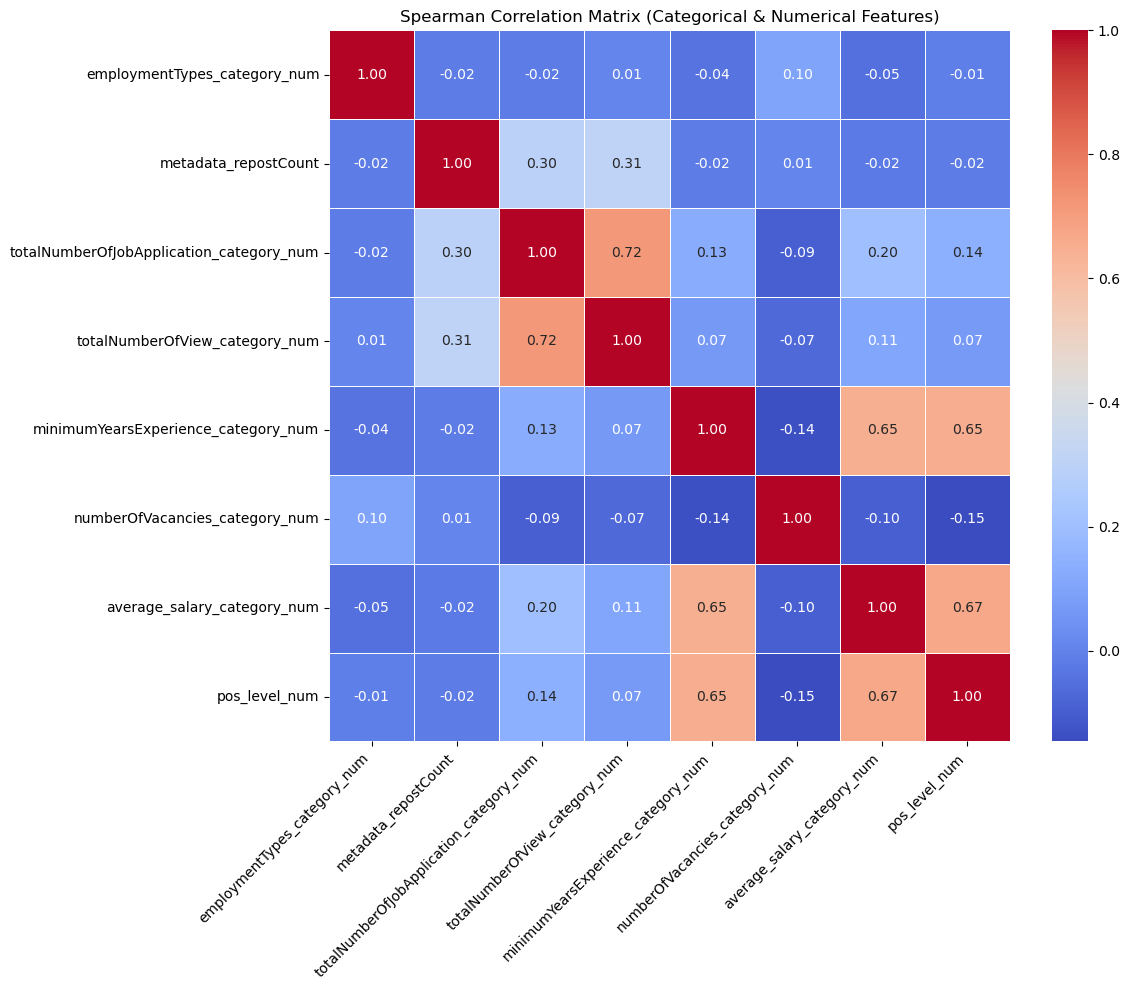

In [50]:
# 4.1. Correlation Matrix (Heatmap)
# A heatmap provides an bird's-eye view of how all numerical features move together.
# 1. Encoding positionLevels as ordinal numbers
pos_map = {
    'Fresh/entry level': 1, 'Non-executive': 2, 'Junior Executive': 3, 
    'Executive': 4, 'Senior Executive': 5, 'Manager': 6, 
    'Professional': 7, 'Middle Management': 8, 'Senior Management': 9
}
# Using .str.strip() to ensure trailing spaces in the data don't cause mapping errors
df_cleaned['pos_level_num'] = df_cleaned['positionLevels'].str.strip().map(pos_map)

# 2. Encoding employmentTypes as ordinal numbers 
emp_map = {
    'Permanent': 1, 'Full Time': 2, 'Contract': 3, 'Part_time': 4, 
    'Temporary': 5, 'Internship/Attachment': 5, 'Freelance': 5, 'Flexi-work': 5
}
df_cleaned['employmentTypes_category_num'] = df_cleaned['employmentTypes'].map(emp_map)

# 3. Helper function to convert category strings (e.g., '9+', '25,000+') to numeric for correlation
def to_numeric_rank(val):
    if pd.isna(val): return np.nan
    # Remove '+' and ',' then convert to float
    clean_val = str(val).replace('+', '').replace(',', '')
    try:
        return float(clean_val)
    except ValueError:
        return np.nan

# Apply conversion to ensure the feature columns are numeric
category_cols = [
    'minimumYearsExperience_category', 'numberOfVacancies_category', 
    'average_salary_category', 'totalNumberOfJobApplication_category', 
    'totalNumberOfView_category'
]

for col in category_cols:
    if col in df_cleaned.columns:
        df_cleaned[f'{col}_num'] = df_cleaned[col].apply(to_numeric_rank)

# 4. Define final feature list (using the numeric versions)
features = [
    'employmentTypes_category_num', 'metadata_repostCount', 
    'totalNumberOfJobApplication_category_num', 'totalNumberOfView_category_num', 
    'minimumYearsExperience_category_num', 'numberOfVacancies_category_num', 
    'average_salary_category_num', 'pos_level_num'
]

# 5. Calculate Spearman Correlation Matrix
corr_matrix = df_cleaned[features].corr(method='spearman')

# 6. Visualize with Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix (Categorical & Numerical Features)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

# Display the matrix
print(corr_matrix)

**Correlation Analysis Findings**

**Very Strong Relationship:**
The total number of **job applications** and total number of **job views** show a very strong positive correlation (spearman r = 0.72), indicating that higher visibility is strongly associated with more applications.

**Strong Relationships:**
**Average salary** shows a strong positive correlation with **position level** (r = 0.67).
**Average salary** also shows a strong positive correlation with **minimum years of experience** (r = 0.67).

**Strong Relationship:**
**Position level** exhibits a strong positive correlation with minimum **years of experience** (r = 0.65), suggesting alignment between seniority and experience requirements.

**Moderate/Weak Relationships:**
**Repost** count shows a moderate positive correlation with:
Total number of **job applications** (r = 0.30)
Total number of **job views** (r = 0.31)

**Weak Relationships:**
The total number of **job applications** and **Average salary** show a weak positive correlation (spearman r = 0.20).


The jump from $r = 0.65$ (Experience vs. Level) to $r = 0.72$ (Views vs. Applications) tells a clear story: while salary is driven by merit (experience/level), the **success of the posting** is driven by visibility.

**Notes:** The Rule of Thumb (Cohen’s Standard)Whether you are using Pearson ($r$), Spearman ($\rho$), or 
Point-Biserial correlation, the interpretation of the absolute value is generally as follows:
| Value of r | Strength | Meaning for your Dashboard |

| 0.0 to 0.1 | Negligible | No relationship. These features don't affect each other.|
| 0.1 to 0.3 | Weak | A slight trend exists, but other factors are much more important. |
| 0.3 to 0.5 | Moderate | A clear relationship. Good for dashboard insights. |
| 0.5 to 0.7 | Strong | One feature is a very good predictor of the other. |
| 0.7 to 1.0 | Very Strong | The features are almost perfectly linked. |

To run a Spearman Correlation, we use the numerical columns that represent your features. 
Even though you've created categorical labels (like "9+"), Spearman's method is perfect here 
because it focuses on rankings rather than the absolute raw values, making it naturally robust 
to the capping and outliers we handled earlier.

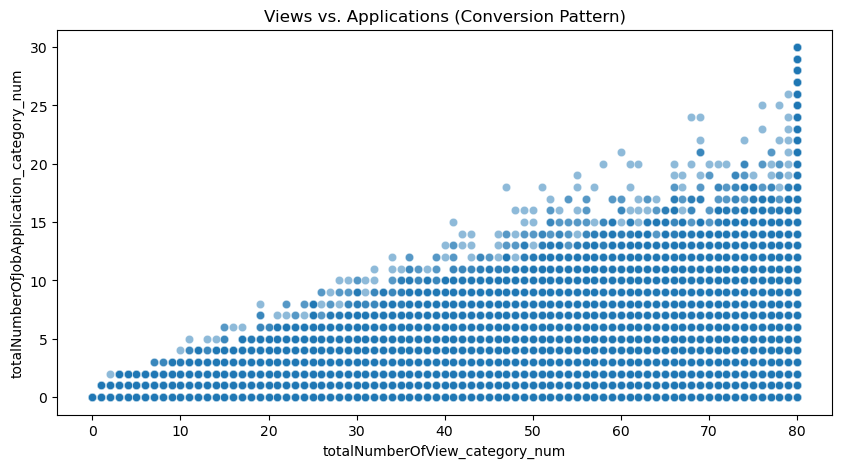

In [51]:
# 4.2 Validate the Correlation Relationships (Robustness Check)
# Very Strong Relationship:
#The total number of job applications and total number of job views show a very strong positive correlation (spearman r = 0.72), indicating that higher visibility is strongly associated with more applications.

plt.figure(figsize=(10, 5))

sns.scatterplot(data=df_cleaned, x='totalNumberOfView_category_num', y='totalNumberOfJobApplication_category_num', alpha=0.5)
plt.title('Views vs. Applications (Conversion Pattern)')
plt.savefig('numerical_analysis.png')

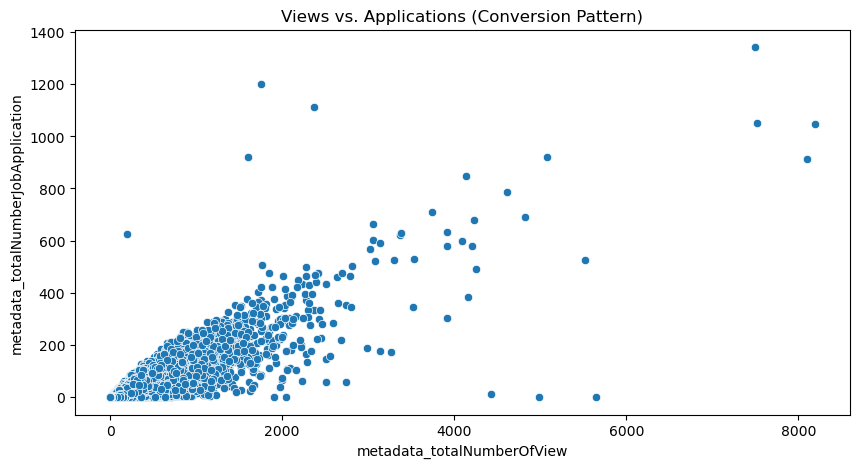

In [52]:
# 4.2
# Very Strong Relationship:
#The total number of job applications and total number of job views show a very strong positive correlation (pearson r = 0.72), indicating that higher visibility is strongly associated with more applications.

plt.figure(figsize=(10, 5))

sns.scatterplot(data=df_cleaned, x='metadata_totalNumberOfView', y='metadata_totalNumberJobApplication')
plt.title('Views vs. Applications (Conversion Pattern)')
plt.savefig('numerical_analysis.png')

**Correlation Relationships (Robustness Check)**

The robustness check confirms that the correlations remain strong and consistent across methods, indicating stable and reliable relationships that support further analysis.

**Activity 5**: Segment the Analysis - Analyze average salary trends across position levels, experience bands,and conversion rate to uncover patterns, identify high-demand roles, and assess job attractiveness.

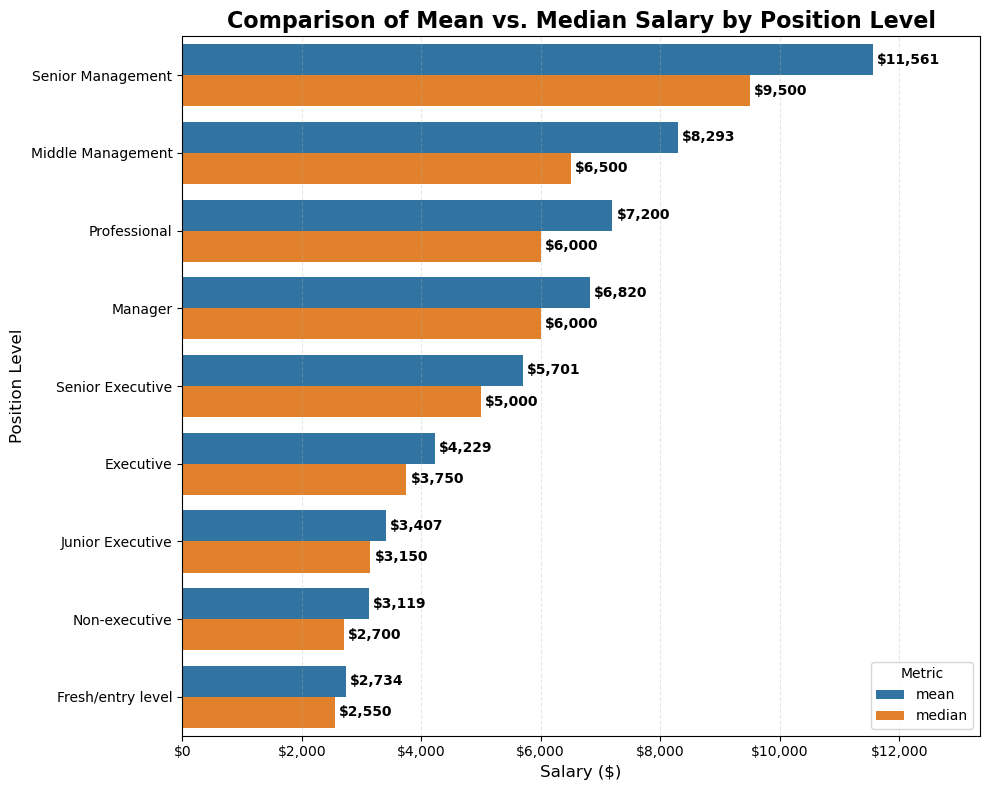

In [53]:
#5.1 Average Salary by Position Level & experience
# a. Average Salary by Position Level
# 1. Calculate Mean and Median
salary_comparison = df_cleaned.groupby("positionLevels")["average_salary"].agg(['mean', 'median'])

# 2. Sort by Mean descending
salary_comparison = salary_comparison.sort_values(by='mean', ascending=False)

# 3. Create the Visualization
plt.figure(figsize=(10, 8))

# Reshape data for seaborn barplot
df_plot = salary_comparison.reset_index().melt(id_vars='positionLevels', var_name='Metric', value_name='Salary')

ax = sns.barplot(data=df_plot, x='Salary', y='positionLevels', hue='Metric', palette=['#1f77b4', '#ff7f0e'])

# 4. Adding Data Labels (Numbers) to the bars
for container in ax.containers:
    # fmt='${:,.0f}' formats the number as currency with commas
    ax.bar_label(container, fmt='${:,.0f}', padding=3, fontsize=10, fontweight='bold')

# Formatting for professional look
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.title("Comparison of Mean vs. Median Salary by Position Level", fontweight='bold', fontsize=16)
plt.xlabel("Salary ($)", fontsize=12)
plt.ylabel("Position Level", fontsize=12)
plt.legend(title="Metric", loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Expand the x-axis limit slightly to make room for the text labels
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)

plt.tight_layout()
plt.savefig('salary_with_labels.png')


**Findings:**  Salary is positively correlated with seniority — higher average salaries are associated with higher position levels. Senior Management earns the highest median salary ($9,500), while Fresh/Entry Level roles have the lowest median salary ($2,550). Notably, Professionals and Managers share the same median salary of $6,000.

                                         mean   median
minimumYearsExperience_category                       
9+                               12772.639926  10250.0
7                                 9393.630478   8500.0
8                                 9046.125897   8500.0
6                                 7918.310907   8000.0
5                                 6406.337614   5500.0
4                                 6014.916128   5500.0
3                                 4904.328176   4250.0
2                                 3809.385278   3500.0
1                                 3242.027821   3000.0
0                                 3012.617050   2700.0


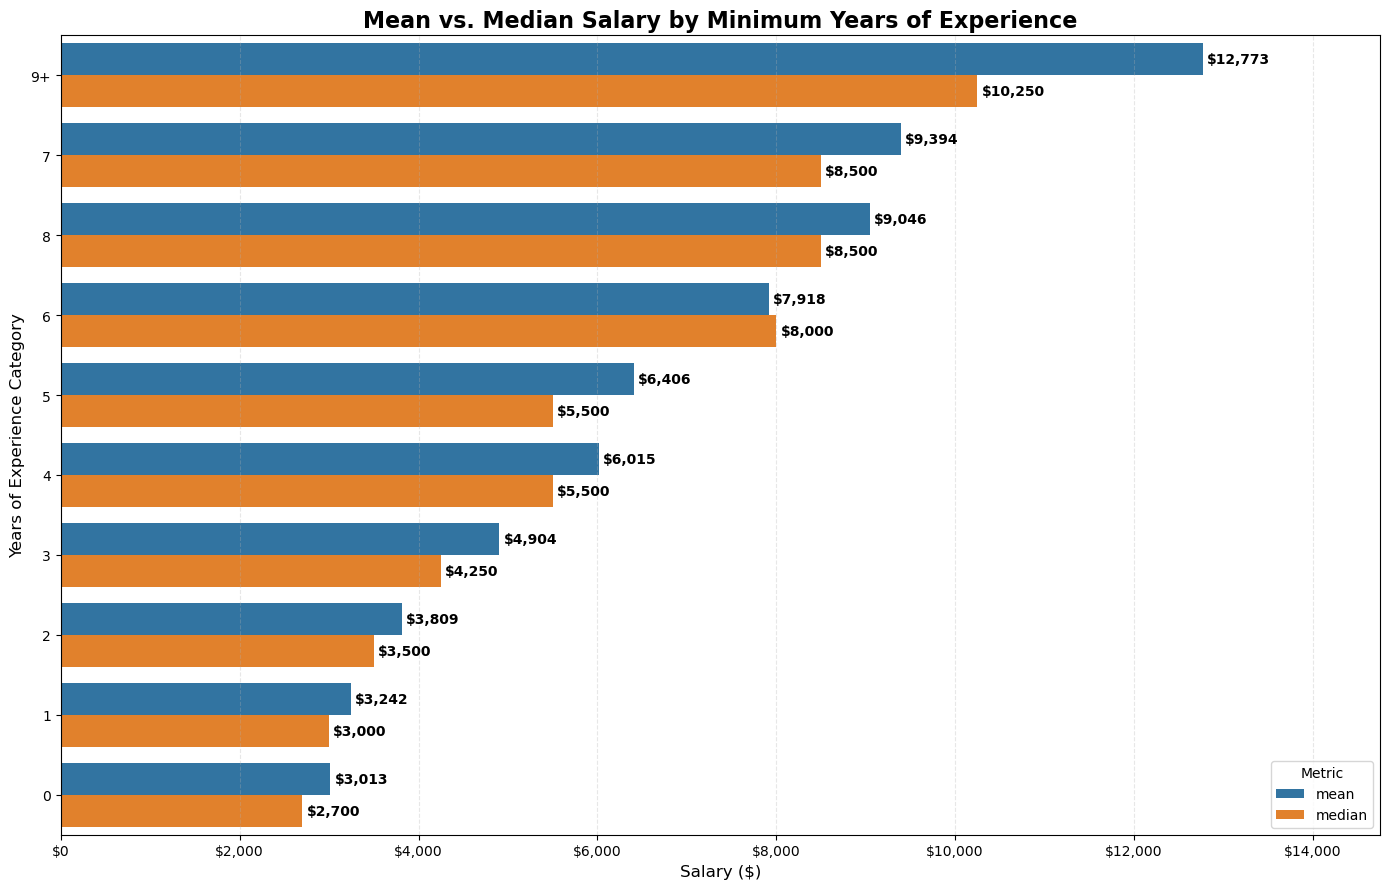

In [54]:
#4.2.2 
# b1. Average Salary by minimumYearsExperience_Category
# 1. Calculate Mean and Median for each experience category
salary_comparison = df_cleaned.groupby("minimumYearsExperience_category")["average_salary"].agg(['mean', 'median'])

# 2. Sort by Mean descending (to show highest paying categories at the top)
salary_comparison = salary_comparison.sort_values(by='mean', ascending=False)

# 3. Create the Visualization
plt.figure(figsize=(14, 9))

# Reshape data for seaborn barplot (Long format)
df_plot = salary_comparison.reset_index().melt(id_vars='minimumYearsExperience_category', var_name='Metric', value_name='Salary')

ax = sns.barplot(data=df_plot, x='Salary', y='minimumYearsExperience_category', hue='Metric', palette=['#1f77b4', '#ff7f0e'])

# 4. Adding Data Labels (Numbers) to the bars
for container in ax.containers:
    # Formats the values with a '$' and comma separators
    ax.bar_label(container, fmt='${:,.0f}', padding=3, fontsize=10, fontweight='bold')

# 5. Formatting for professional appearance
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.title("Mean vs. Median Salary by Minimum Years of Experience", fontweight='bold', fontsize=16)
plt.xlabel("Salary ($)", fontsize=12)
plt.ylabel("Years of Experience Category", fontsize=12)
plt.legend(title="Metric", loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Expand the x-axis limit slightly so the text labels aren't cut off
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)

plt.tight_layout()
plt.savefig('salary_experience_comparison.png')

# Output the table for reference
print(salary_comparison)

**Findings:**  
Salary is positively correlated with years of experience — higher experience is associated with higher pay. Employees with 9+ years of experience earn the highest median salary ($10,250), while fresh candidates earn the lowest ($2,700).

Notably, those with 4 and 5 years share the same median salary ($5,500), followed by a sharp increase to $8,000 after 5 years. Similarly, 7 and 8 years share a median of $8,500, with another significant jump to $10,250 after 8 years.

This suggests the market particularly values professionals at the 4–5 year milestone and those with 9+ years of experience.

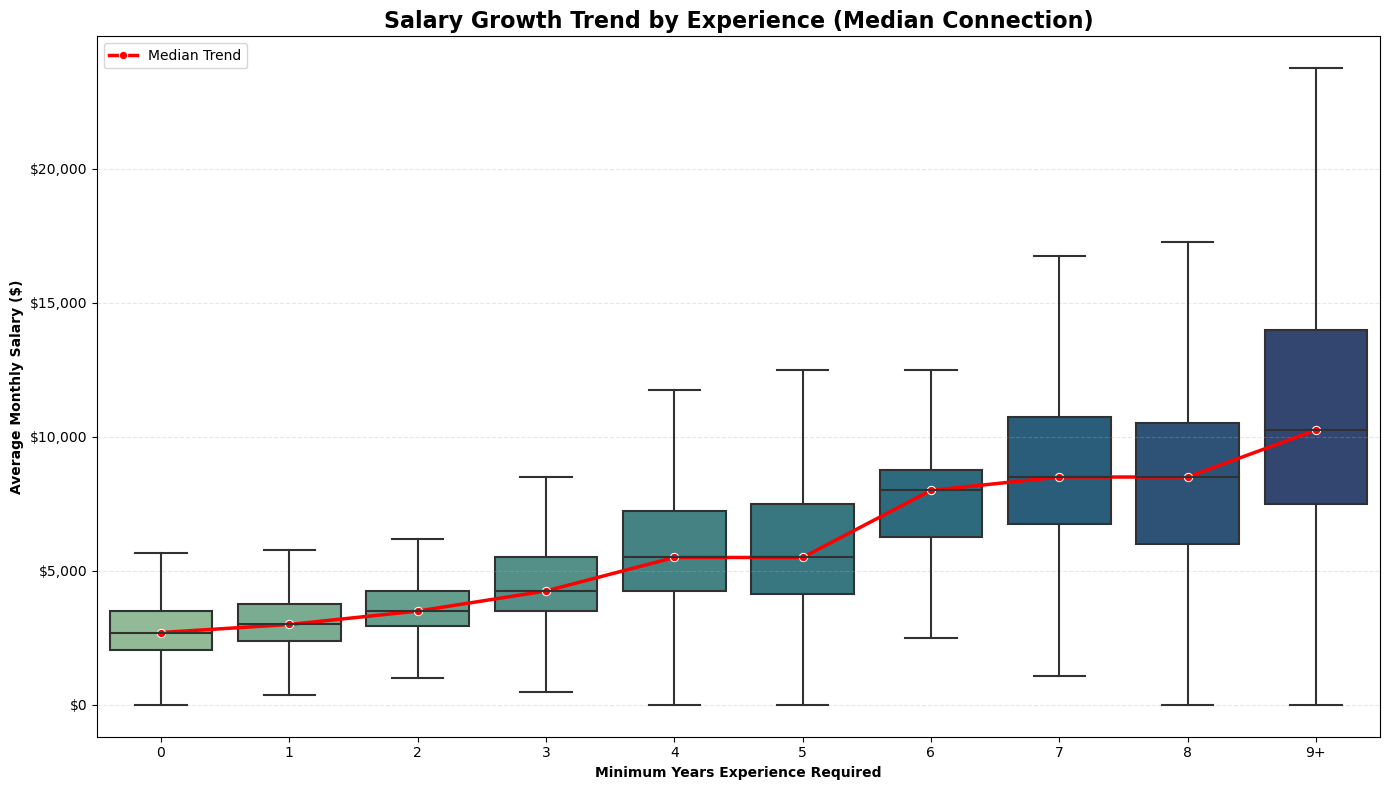

In [55]:
#4.2.2 
# b2. Average Salary by minimumYearsExperience
# 1. Prepare the cleaned and capped data
df_cleaned['min_exp_grouped'] = df_cleaned['minimumYearsExperience'].clip(upper=9)
df_plot = df_cleaned[df_cleaned['average_salary'] <= 100000].copy()

# 2. Set up the figure
plt.figure(figsize=(14, 8))

# 3. Create the Boxplot (the foundation)
ax = sns.boxplot(
    data=df_plot, 
    x='min_exp_grouped', 
    y='average_salary', 
    palette='crest',
    showfliers=False  # Hiding fliers makes the trend line more visible
)

# 4. ADD THE RED TREND LINE (Connecting Medians)
# estimator=np.median ensures the line tracks the horizontal bar inside the boxes
import numpy as np
sns.lineplot(
    data=df_plot, 
    x='min_exp_grouped', 
    y='average_salary', 
    estimator=np.median, 
    errorbar=None, 
    color='red', 
    marker='o', 
    linewidth=2.5, 
    label='Median Trend'
)

# 5. Professional Formatting
# Update labels to show "9+"
labels = [item.get_text() for item in ax.get_xticklabels()]
if labels:
    labels[-1] = '9+'
    ax.set_xticklabels(labels)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.title('Salary Growth Trend by Experience (Median Connection)', fontweight='bold', fontsize=16)
plt.xlabel('Minimum Years Experience Required', fontweight='bold')
plt.ylabel('Average Monthly Salary ($)', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**Findings:** Similar patterns were observed in the box plot, which confirms the findings from the bar chart and strengthens the consistency of the results.

/tmp/ipykernel_1512/2449036900.py:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/vivian/miniconda3/envs/pds/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


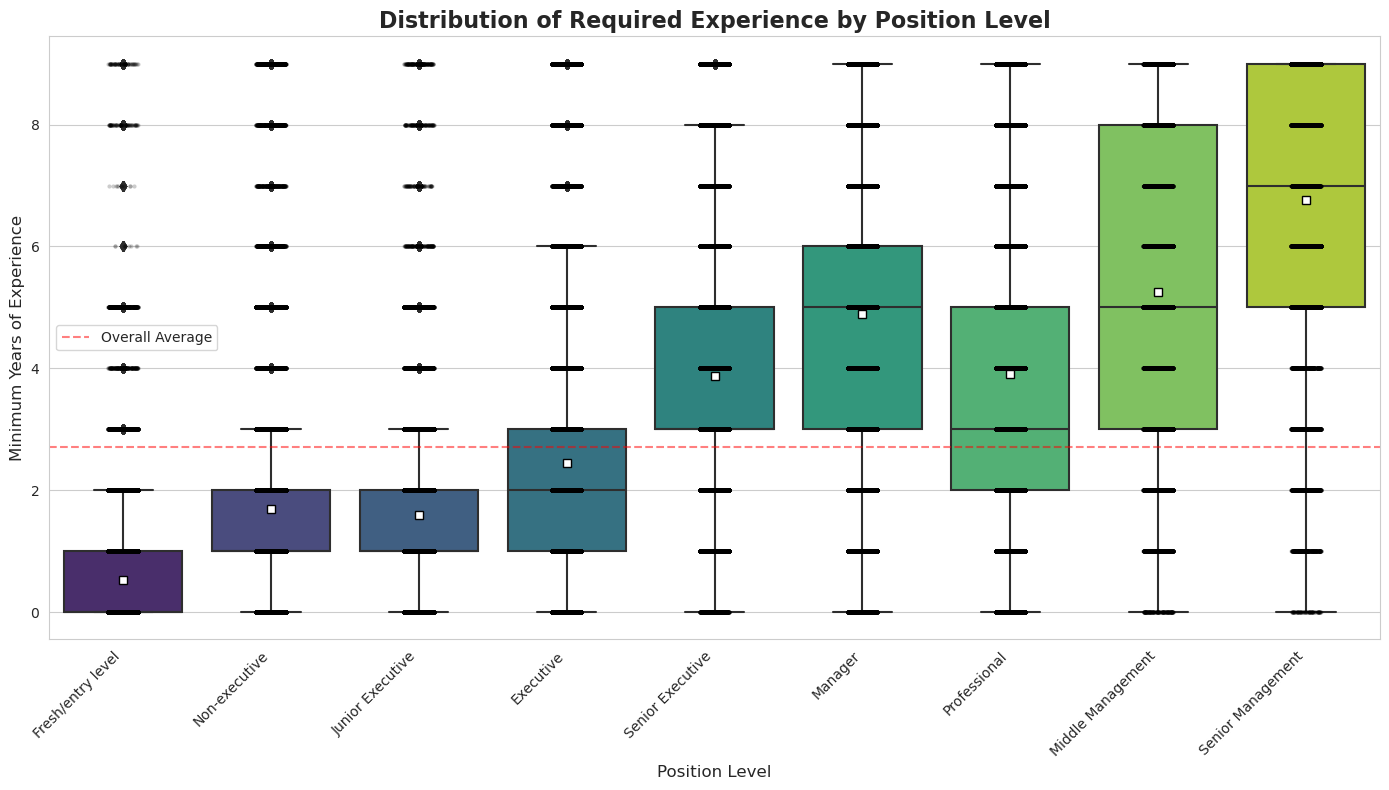

In [56]:
# 4.3 minimumYearsExperience required by position level
# 1. Sort position levels in a logical order
pos_order = [
    'Fresh/entry level', 'Non-executive', 'Junior Executive', 
    'Executive', 'Senior Executive', 'Manager', 
    'Professional', 'Middle Management', 'Senior Management'
]

# 2. Set the style and figure size
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# 3. Create the Box Plot (fixing the column name typo)
ax = sns.boxplot(
    data=df_cleaned, 
    x='positionLevels', 
    y='minimumYearsExperience_category_num', # Removed the extra 'z'
    order=pos_order,
    palette='viridis',
    showmeans=True, # Shows a triangle for the mean
    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"}
)

# 4. Add Jitter (Stripplot) to show data density
sns.stripplot(
    data=df_cleaned, 
    x='positionLevels', 
    y='minimumYearsExperience_category_num', 
    order=pos_order,
    color='black', 
    alpha=0.2, 
    size=3,
    jitter=True
)

# 5. Formatting
plt.title('Distribution of Required Experience by Position Level', fontweight='bold', fontsize=16)
plt.xlabel('Position Level', fontsize=12)
plt.ylabel('Minimum Years of Experience', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Added a horizontal line for the overall dataset average
plt.axhline(df_cleaned['minimumYearsExperience_category_num'].mean(), 
            color='red', linestyle='--', alpha=0.5, label='Overall Average')

plt.legend()
plt.tight_layout()
plt.show()

**Findings:** Position level is associated with required years of experience, but this does not necessarily mean that more years of experience will automatically lead to a higher position level.

Senior Management roles require the highest experience, with an average of 7 years. Around 4 years of experience is typically associated with Senior Executive and Professional roles, while 5 years of experience is generally aligned with Management level positions.This indicates that knowledge and skills also play a key role in determining job level.

In [57]:
#4.4 Given the strong relationship between views and applications, conversion rate is used to measure post efficiency,
# indicating how persuasive and attractive a job posting is.
# Segment Analysis: What drives high conversion?
# 1. Calculate Conversion Rate (%)
# We add 1 to views to avoid division by zero errors
df_cleaned['conversion_rate'] = (df_cleaned['totalNumberOfJobApplication_category_num'] / 
                                (df_cleaned['totalNumberOfView_category_num'] + 1)) * 100

# 2. Summary Statistics
print(df_cleaned['conversion_rate'].describe())

# 3. Distribution of Conversion Rates

count    1.044597e+06
mean     4.696664e+00
std      8.707855e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.250000e+00
max      6.666667e+01
Name: conversion_rate, dtype: float64


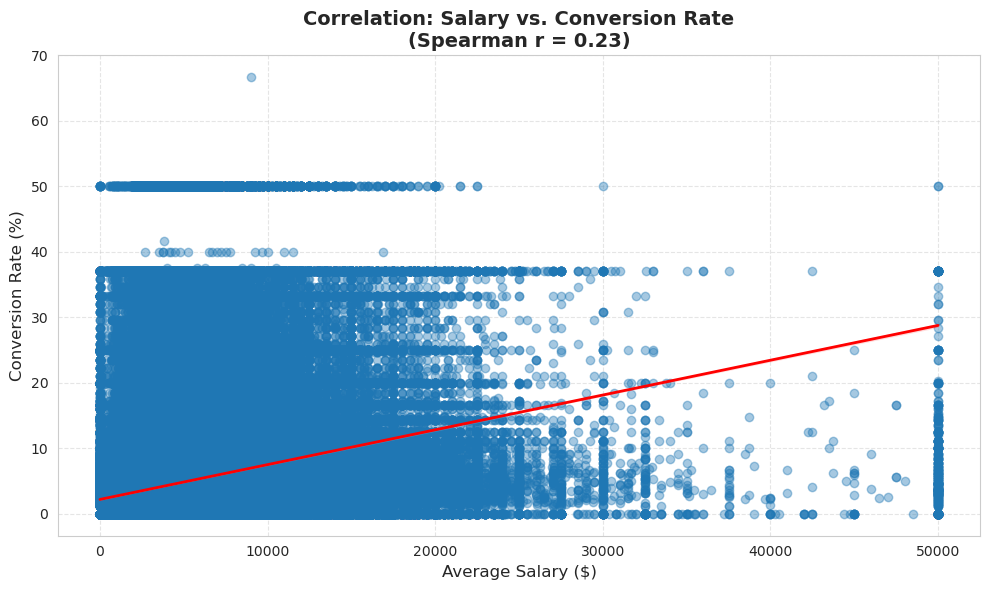

In [58]:
#4.4 Segment Analysis: What drives high conversion?
#a. Correlation between Average Salary and Conversion Rate
from scipy import stats

# 1. Calculate the Conversion Rate if not already done
df_cleaned['conversion_rate'] = (df_cleaned['totalNumberOfJobApplication_category_num'] / 
                                (df_cleaned['totalNumberOfView_category_num'] + 1)) * 100

# 2. Calculate Spearman Correlation Coefficient
rho, p_val = stats.spearmanr(df_cleaned['average_salary_category_num'], df_cleaned['conversion_rate'])

# 3. Create the Correlation Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_cleaned, 
    x='average_salary_category_num', 
    y='conversion_rate', 
    scatter_kws={'alpha':0.4, 'color':'#1f77b4'}, 
    line_kws={'color':'red', 'lw':2}
)

# 4. Formatting
plt.title(f'Correlation: Salary vs. Conversion Rate\n(Spearman r = {rho:.2f})', fontweight='bold', fontsize=14)
plt.xlabel('Average Salary ($)', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('salary_cvr_correlation.png')

**Observation:** Conversion Rate and **Average salary** shows a weak positive correlation (spearman r = 0.23).

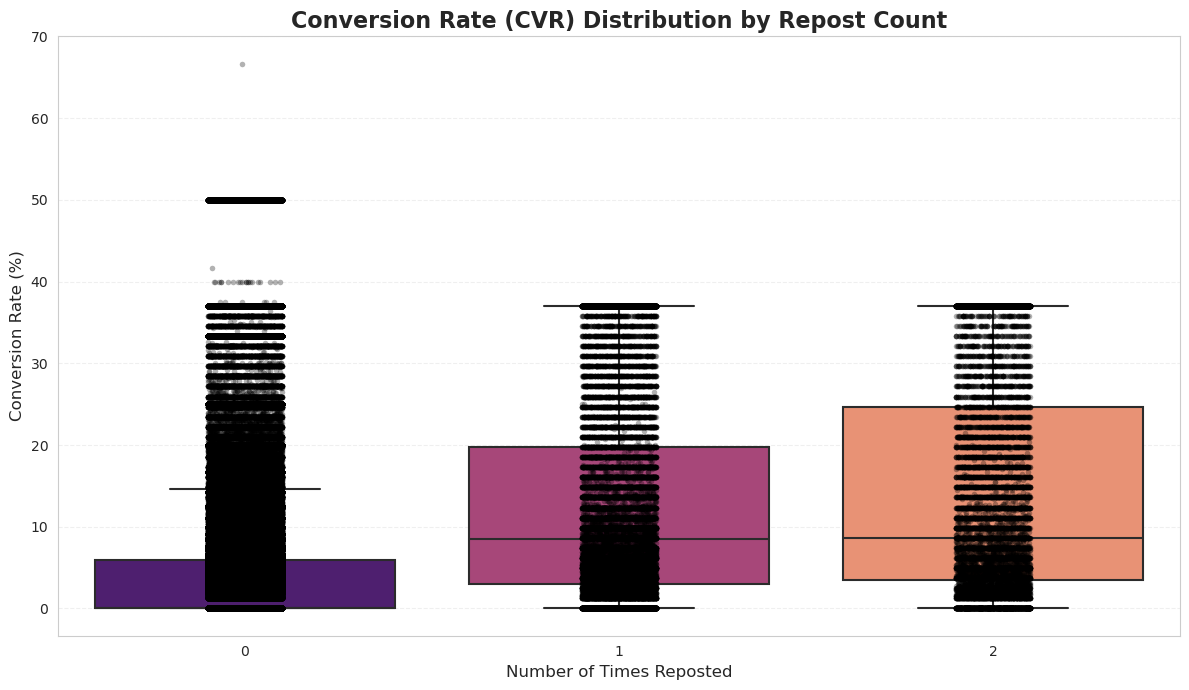

In [59]:
#4.4 Segment Analysis: What drives high conversion?
# b. Conversion Rate by Repost Count
# 1. Calculate Conversion Rate
df_cleaned['conversion_rate'] = (df_cleaned['totalNumberOfJobApplication_category_num'] / 
                                (df_cleaned['totalNumberOfView_category_num'] + 1)) * 100

# 2. Create the Boxplot
plt.figure(figsize=(12, 7))

# We use a boxplot to see the distribution of CVR at each repost level
ax = sns.boxplot(
    data=df_cleaned, 
    x='metadata_repostCount', 
    y='conversion_rate', 
    palette='magma',
    showfliers=False # Hiding extreme outliers to focus on the trend
)

# 3. Add Jitter to show the density of jobs at each level
sns.stripplot(
    data=df_cleaned, 
    x='metadata_repostCount', 
    y='conversion_rate', 
    color='black', 
    alpha=0.3, 
    size=4,
    jitter=True
)

# 4. Formatting for clarity
plt.title('Conversion Rate (CVR) Distribution by Repost Count', fontweight='bold', fontsize=16)
plt.xlabel('Number of Times Reposted', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('cvr_repost_boxplot.png')

**Observation:** Non-reposted jobs show a lower conversion rate (~1.5%), whereas reposted jobs have a higher conversion rate (about 8%), suggesting that reposting improve post efficiency.

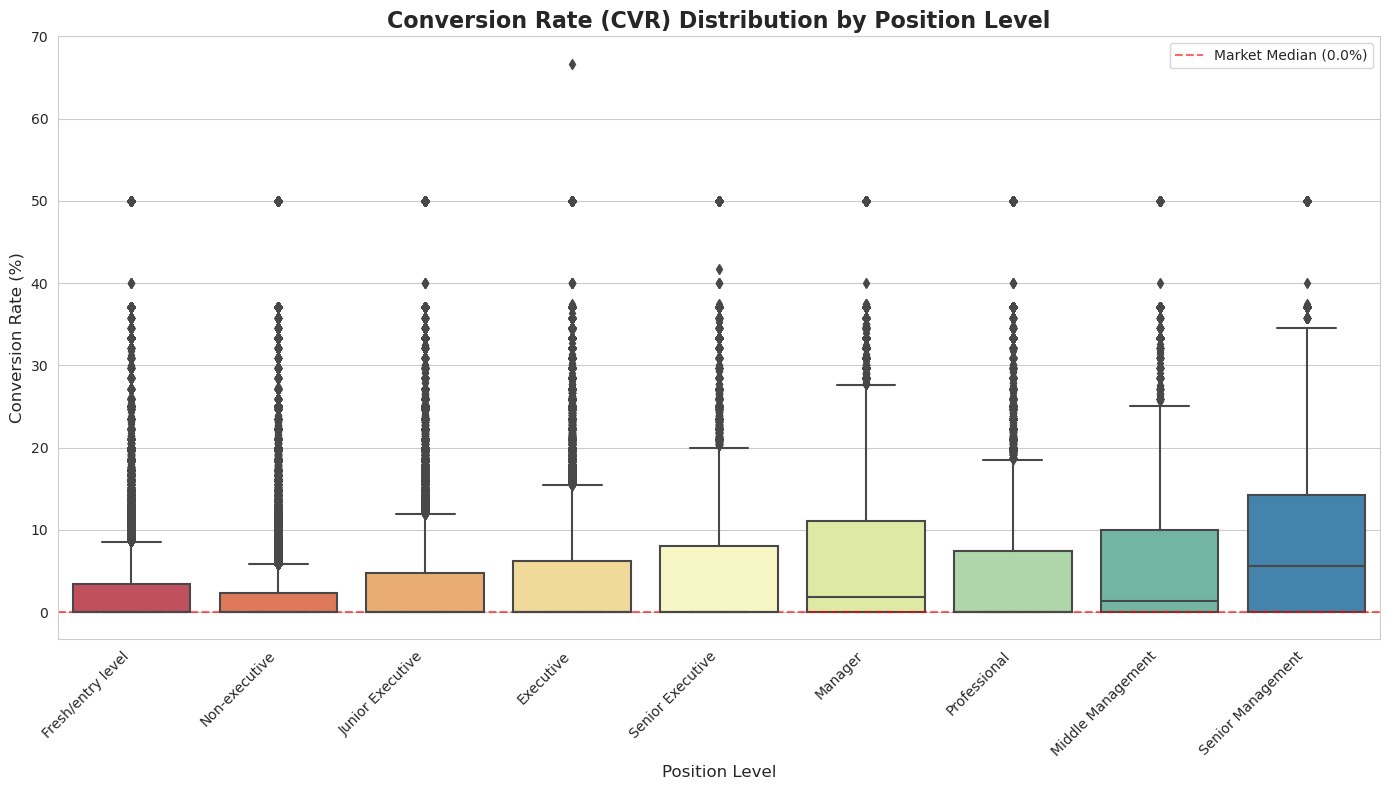

In [60]:
#4.4 
# d. positionLevels with the highest conversion rates
# 1. Define the logical seniority order
pos_order = [
    'Fresh/entry level', 'Non-executive', 'Junior Executive', 
    'Executive', 'Senior Executive', 'Manager', 
    'Professional', 'Middle Management', 'Senior Management'
]

# 2. Calculate CVR already done
df_cleaned['conversion_rate'] = (df_cleaned['totalNumberOfJobApplication_category_num'] / 
                                (df_cleaned['totalNumberOfView_category_num'] + 1)) * 100

# 3. Create the Visualization
plt.figure(figsize=(14, 8))

# Using a boxplot to see the range of CVR at each level
ax = sns.boxplot(
    data=df_cleaned, 
    x='positionLevels', 
    y='conversion_rate', 
    order=pos_order,
    palette='Spectral',
    showfliers=True # Keep outliers to see 'Viral' job posts
)

# 4. Add a horizontal line for the Market Median
market_median = df_cleaned['conversion_rate'].median()
plt.axhline(market_median, color='red', linestyle='--', alpha=0.6, label=f'Market Median ({market_median:.1f}%)')

# 5. Formatting
plt.title('Conversion Rate (CVR) Distribution by Position Level', fontweight='bold', fontsize=16)
plt.xlabel('Position Level', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

**Findings:** Conversion rates are higher for Management-level positions, indicating these roles attract more applications relative to their views compared to other levels.

**Activity 7**: Time Series Analysis Capturing the daily dynamics of Jobs and monitoring new jobs opened for a comprehensive overview.

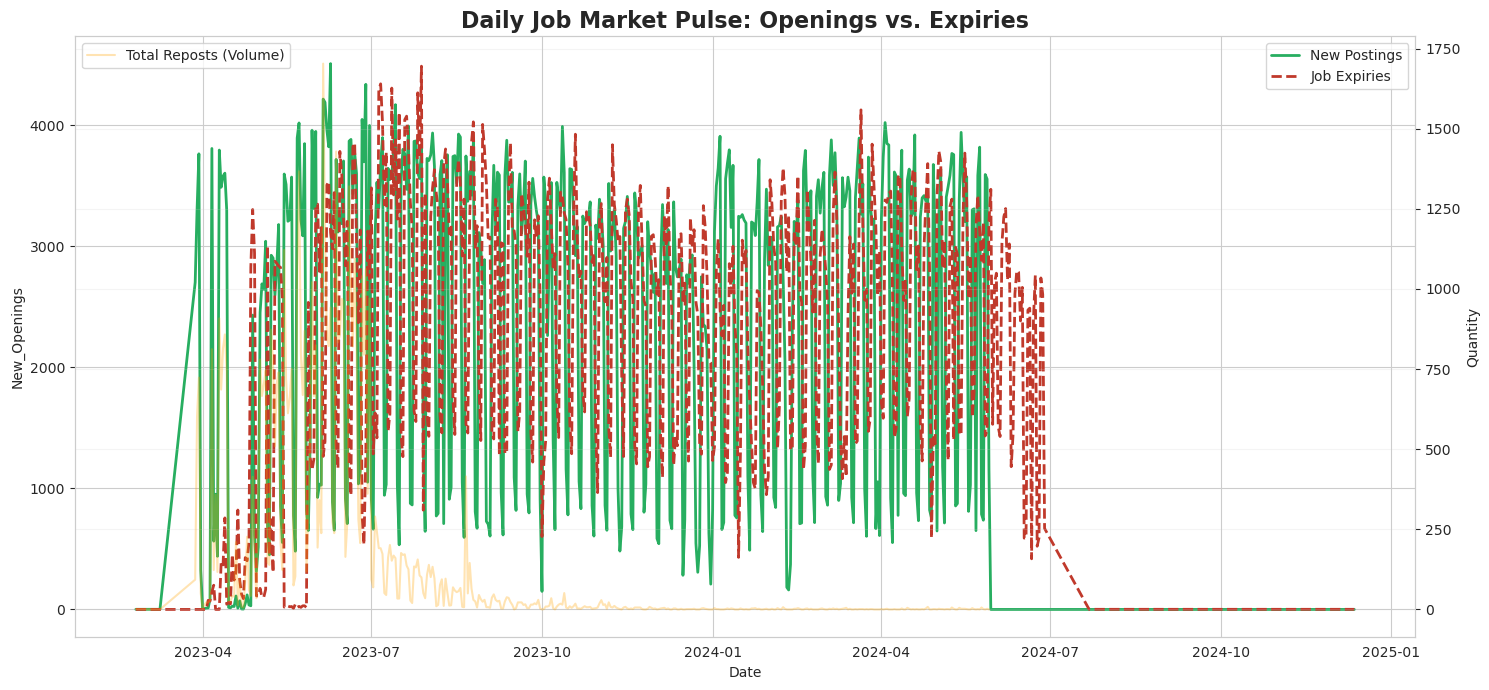

In [61]:
# 7.1. Explore the daily trend of new jobs opened and new closed jobs using line plots.
# 1. Convert to datetime
df_cleaned['metadata_newPostingDate'] = pd.to_datetime(df_cleaned['metadata_newPostingDate'])
df_cleaned['metadata_expiryDate'] = pd.to_datetime(df_cleaned['metadata_expiryDate'])

# 2. Group by date to get daily counts
opened_daily = df_cleaned.groupby('metadata_newPostingDate').size().reset_index(name='New_Openings')
closed_daily = df_cleaned.groupby('metadata_expiryDate').size().reset_index(name='Expiries')

# 3. Merge into a single timeline dataframe 
# Use 'outer' to keep all dates from both columns
trend_df = pd.merge(
    opened_daily, 
    closed_daily, 
    left_on='metadata_newPostingDate', 
    right_on='metadata_expiryDate', 
    how='outer'
)

# 4. FIX THE ERROR: Create the Date column FIRST, then fillna for counts only
# This ensures 'Date' only contains Timestamps
trend_df['Date'] = trend_df['metadata_newPostingDate'].fillna(trend_df['metadata_expiryDate'])

# 5. Now fill zeros for the numeric columns only
trend_df['New_Openings'] = trend_df['New_Openings'].fillna(0)
trend_df['Expiries'] = trend_df['Expiries'].fillna(0)

# 6. Sort and subset
trend_df = trend_df[['Date', 'New_Openings', 'Expiries']].sort_values('Date')

# 7. plotting the trends
plt.figure(figsize=(15, 7))

# Plot Openings and Expiries
sns.lineplot(data=trend_df, x='Date', y='New_Openings', label='New Postings', color='#27ae60', lw=2)
sns.lineplot(data=trend_df, x='Date', y='Expiries', label='Job Expiries', color='#c0392b', lw=2, linestyle='--')

# Optional: Add Repost Count trend on a secondary Y-axis to see if reposts spike when expiries drop
ax2 = plt.twinx()
repost_trend = df_cleaned.groupby('metadata_newPostingDate')['metadata_repostCount'].sum().reset_index()
sns.lineplot(data=repost_trend, x='metadata_newPostingDate', y='metadata_repostCount', 
             color='orange', alpha=0.3, label='Total Reposts (Volume)')
ax2.set_ylabel('Total Repost Volume')

# Formatting
plt.title('Daily Job Market Pulse: Openings vs. Expiries', fontweight='bold', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True, alpha=0.2)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**Activity 6**: In-Depth job categories and job title Analysis - Conducting an in-depth examination of specific job categories and/or job title, understanding the correlation between job categories and job titles and no. of years experience, and exploring salaries variations in job titles and job categories distribution.

Using column: employmentTypes


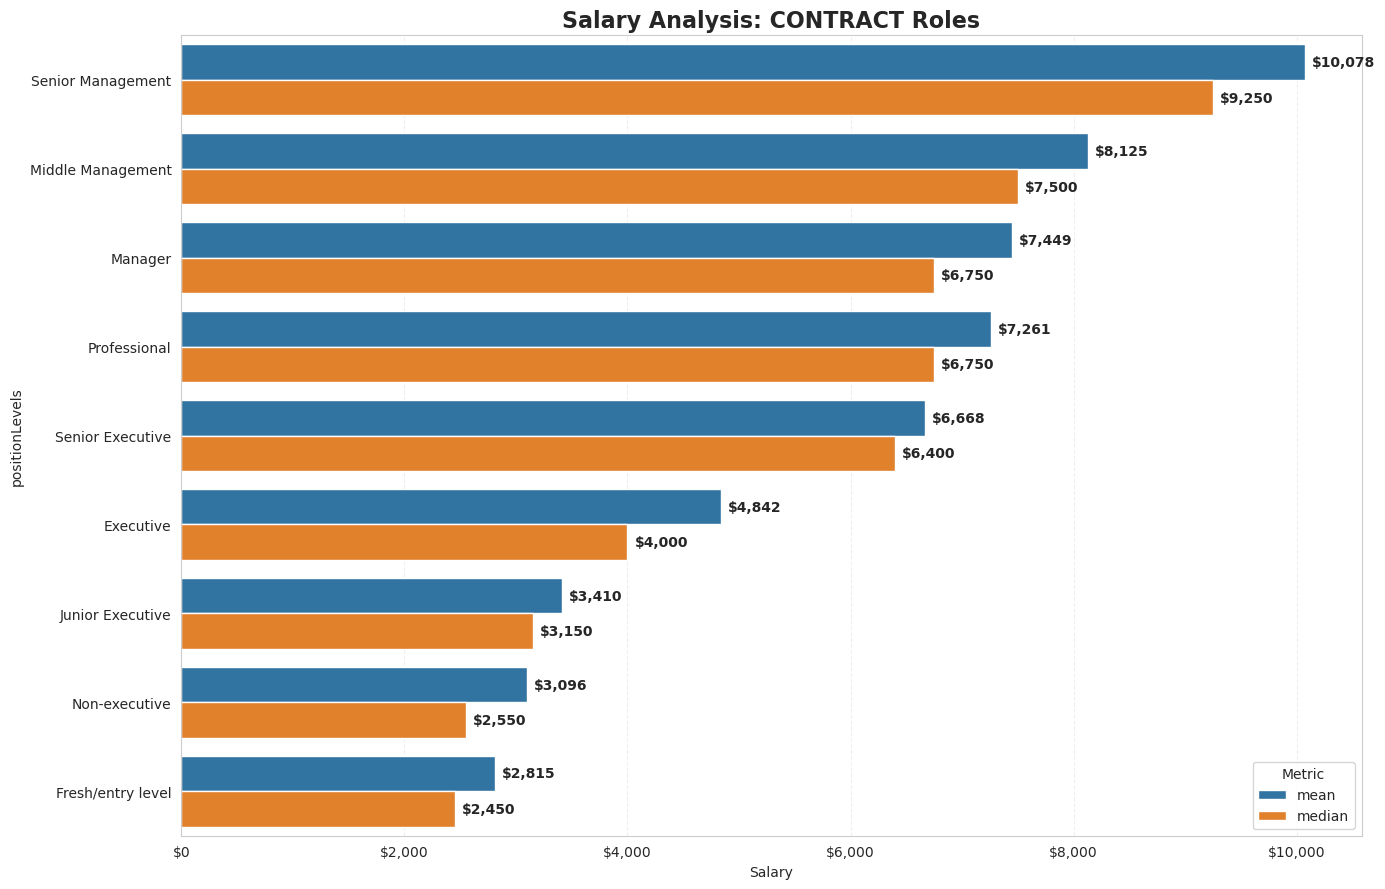

In [62]:
# 6.1 Visualize the average salary and median salary across position levels for a specific employment type.

employmenttypes_input = 'contract' # ← change this to your desired employment type (e.g., 'Permanent', 'Full Time', 'Contract', 'Part_time', 'Temporary', etc.)

# 1. Identify the correct column name
# This line looks for any column that contains the word 'employ' 
potential_cols = [c for c in df_cleaned.columns if 'employ' in c.lower()]

if not potential_cols:
    print("Error: Could not find an employment type column. Please check df_cleaned.columns")
else:
    target_col = potential_cols[0] # Use the first match found
    print(f"Using column: {target_col}")

    # 2. Filter dataset safely
    # We use .str.contains() to handle cases where a cell might have 'Permanent' vs 'permanent '
    employmenttypes_df = df_cleaned[
        df_cleaned[target_col].str.contains(employmenttypes_input, case=False, na=False)
    ].copy()

    if employmenttypes_df.empty:
        print(f"No records found for '{employmenttypes_input}'. Available types are: {df_cleaned[target_col].unique()}")
    else:
        # 3. Calculate Stats
        salary_comparison = employmenttypes_df.groupby("positionLevels")["average_salary"].agg(['mean', 'median'])
        salary_comparison = salary_comparison.sort_values(by='mean', ascending=False)

        # 4. Visualization
        plt.figure(figsize=(14, 9))
        df_plot = salary_comparison.reset_index().melt(id_vars='positionLevels', var_name='Metric', value_name='Salary')

        ax = sns.barplot(data=df_plot, x='Salary', y='positionLevels', hue='Metric', palette=['#1f77b4', '#ff7f0e'])

        # 5. Labels & Formatting
        for container in ax.containers:
            ax.bar_label(container, fmt='${:,.0f}', padding=5, fontweight='bold')

        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
        plt.title(f"Salary Analysis: {employmenttypes_input.upper()} Roles", fontweight='bold', fontsize=16)
        plt.grid(axis='x', linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()

Using column: title


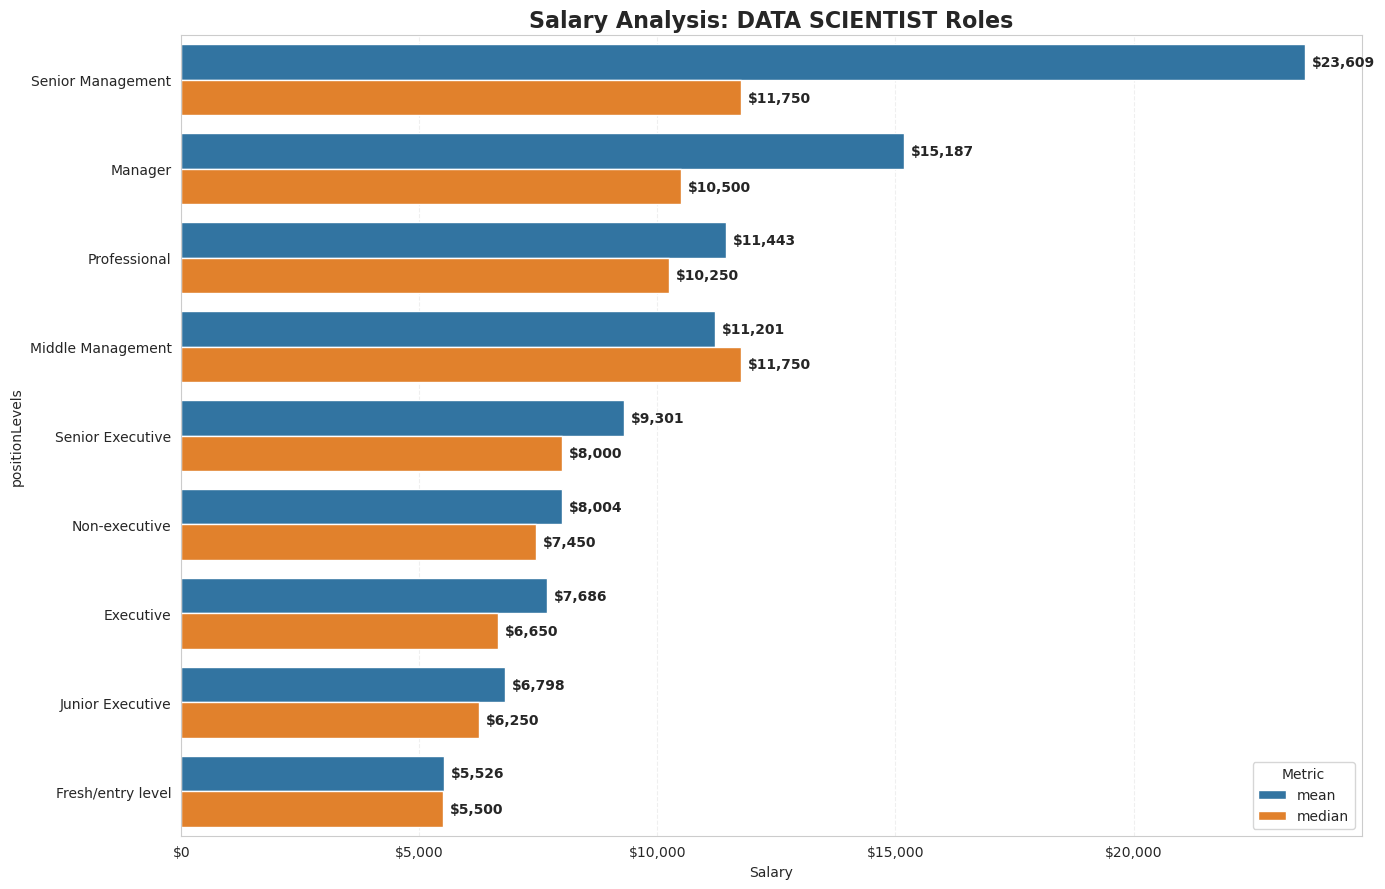

In [63]:
# 6.2 Visualize the average salary and median salary across position levels for a specific job title.

title_input = 'Data Scientist' # ← change this to your desired title (e.g., 'Data Scientist', 'Software Engineer', 'Project Manager', etc.)
# 1. Identify the correct column name
# This line looks for any column that contains the word 'title' 
potential_cols = [c for c in df_cleaned.columns if 'title' in c.lower()]

if not potential_cols:
    print("Error: Could not find a job title column. Please check df_cleaned.columns")
else:
    target_col = potential_cols[0] # Use the first match found
    print(f"Using column: {target_col}")

    # 2. Filter dataset safely
    # We use .str.contains() to handle cases where a cell might have 'Permanent' vs 'permanent '
    employmenttypes_df = df_cleaned[
        df_cleaned[target_col].str.contains(title_input, case=False, na=False)
    ].copy()

    if employmenttypes_df.empty:
        print(f"No records found for '{title_input}'. Available titles are: {df_cleaned[target_col].unique()}")
    else:
        # 3. Calculate Stats
        salary_comparison = employmenttypes_df.groupby("positionLevels")["average_salary"].agg(['mean', 'median'])
        salary_comparison = salary_comparison.sort_values(by='mean', ascending=False)

        # 4. Visualization
        plt.figure(figsize=(14, 9))
        df_plot = salary_comparison.reset_index().melt(id_vars='positionLevels', var_name='Metric', value_name='Salary')

        ax = sns.barplot(data=df_plot, x='Salary', y='positionLevels', hue='Metric', palette=['#1f77b4', '#ff7f0e'])

        # 5. Labels & Formatting
        for container in ax.containers:
            ax.bar_label(container, fmt='${:,.0f}', padding=5, fontweight='bold')

        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
        plt.title(f"Salary Analysis: {title_input.upper()} Roles", fontweight='bold', fontsize=16)
        plt.grid(axis='x', linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()

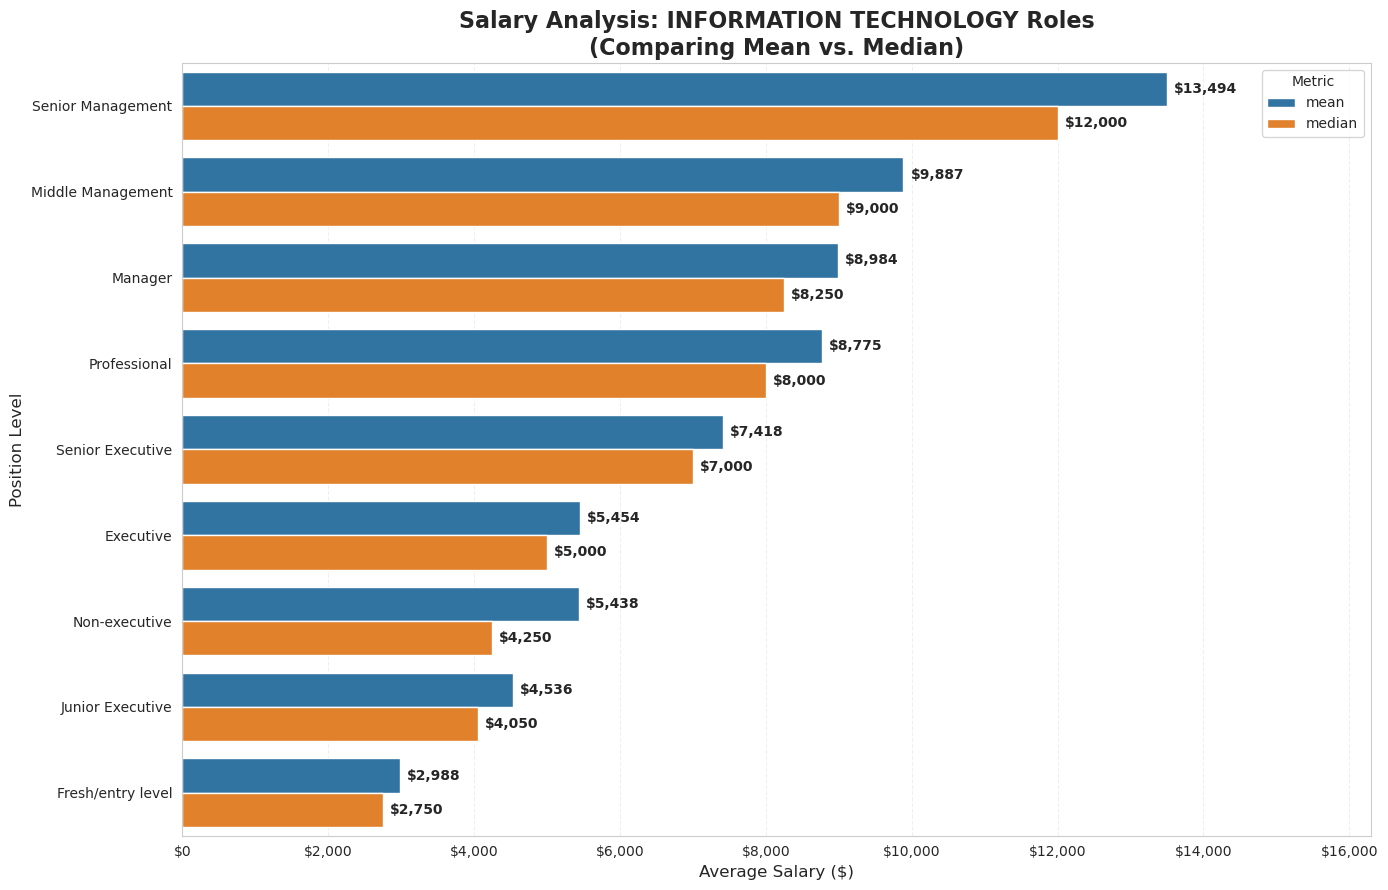

In [64]:
# 6.3 Visualize the average salary and median salary across position levels for a specific job category.

category_text_input = 'Information Technology'  # Change this to any industry you want to explore

# 1. Identify the correct column name for category
potential_cols = [c for c in df_cleaned.columns if 'category_text' in c.lower()]

if not potential_cols:
    print("Error: Could not find a 'category_text' column. Please check df_cleaned.columns")
else:
    target_col = potential_cols[0]
    
    # 2. Filter the dataset for the specific industry
    # Using case=False to catch 'information technology' and 'Information Technology'
    industry_df = df_cleaned[
        df_cleaned[target_col].str.contains(category_text_input, case=False, na=False)
    ].copy()

    if industry_df.empty:
        # If no results, show the user what categories ARE available
        unique_cats = df_cleaned[target_col].str.split('|').explode().str.strip().unique()
        print(f"No records found for '{category_text_input}'.")
        print(f"Sample available categories: {list(unique_cats[:10])}")
    else:
        # 3. Calculate Stats (Mean vs Median Salary) by Position Level
        salary_comparison = industry_df.groupby("positionLevels")["average_salary"].agg(['mean', 'median'])
        salary_comparison = salary_comparison.sort_values(by='mean', ascending=False)

        # 4. Prepare for Visualization (Melting the data for Seaborn)
        df_plot = salary_comparison.reset_index().melt(id_vars='positionLevels', var_name='Metric', value_name='Salary')

        # 5. Create the Visualization
        plt.figure(figsize=(14, 9))
        ax = sns.barplot(
            data=df_plot, 
            x='Salary', 
            y='positionLevels', 
            hue='Metric', 
            palette=['#1f77b4', '#ff7f0e']
        )

        # 6. Add Currency Labels to the end of bars
        for container in ax.containers:
            ax.bar_label(container, fmt='${:,.0f}', padding=5, fontweight='bold', fontsize=10)

        # Formatting
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
        plt.title(f"Salary Analysis: {category_text_input.upper()} Roles\n(Comparing Mean vs. Median)", 
                  fontweight='bold', fontsize=16)
        plt.xlabel("Average Salary ($)", fontsize=12)
        plt.ylabel("Position Level", fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.3)
        
        # Add extra room on the right so labels don't get cut off
        ax.set_xlim(right=ax.get_xlim()[1] * 1.15)
        
        plt.tight_layout()
        plt.show()

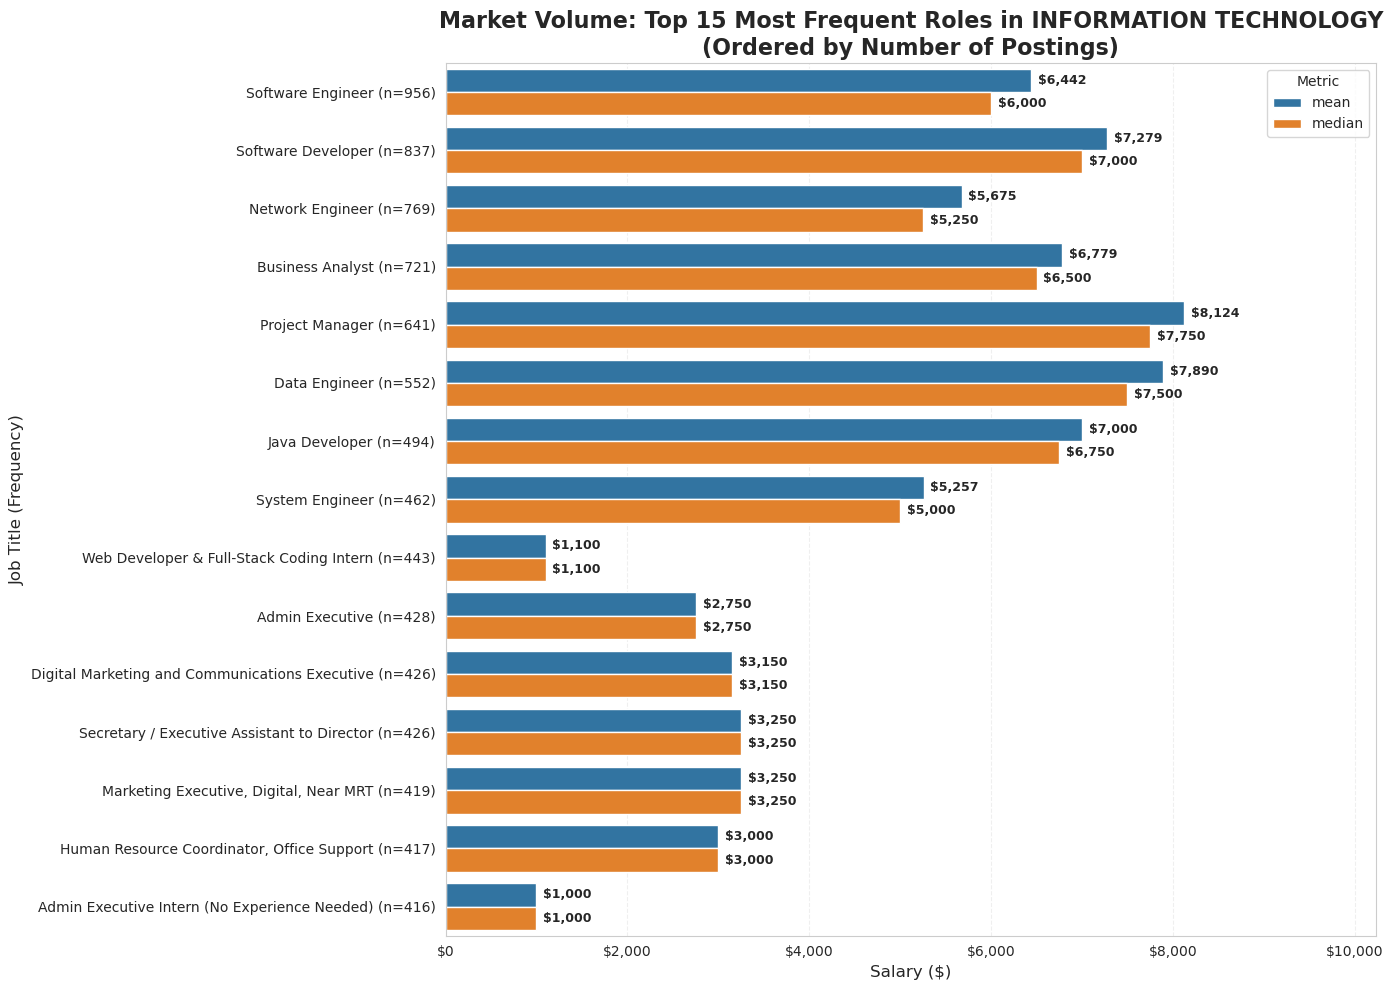

In [65]:
# 6.4 Visualize the average salary and median salary across job title (To rank the Top 15 Job Titles based on posting count) for a specific job category.

# 1. Configuration
category_text_input = 'Information Technology' 

# 2. Filter by Category
# (Assuming df_cleaned and target_col are defined as in previous steps)
industry_df = df_cleaned[
    df_cleaned['category_text'].str.contains(category_text_input, case=False, na=False)
].copy()

# 3. Calculate Stats
salary_stats = industry_df.groupby("title")["average_salary"].agg(['mean', 'median', 'count'])

# 4. PRIMARY FILTER & SORT: Min Count 5, then sort by COUNT (Frequency)
# We take the head(15) based on popularity, not price
salary_stats = salary_stats[salary_stats['count'] >= 5]
top_15_by_count = salary_stats.sort_values(by='count', ascending=False).head(15)

# 5. Prepare for Visualization
df_plot = top_15_by_count.reset_index().melt(
    id_vars=['title', 'count'], 
    value_vars=['mean', 'median'], 
    var_name='Metric', 
    value_name='Salary'
)

# 6. Create the Visualization
plt.figure(figsize=(14, 10))
ax = sns.barplot(
    data=df_plot, 
    x='Salary', 
    y='title', 
    hue='Metric', 
    palette=['#1f77b4', '#ff7f0e']
)

# 7. Add Count (n) labels to the Y-axis
new_labels = [f"{t} (n={int(top_15_by_count.loc[t, 'count'])})" for t in top_15_by_count.index]
ax.set_yticklabels(new_labels)

# 8. Add Data Labels (Currency)
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', padding=5, fontweight='bold', fontsize=9)

# Formatting
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.title(f"Market Volume: Top 15 Most Frequent Roles in {category_text_input.upper()}\n(Ordered by Number of Postings)", 
          fontweight='bold', fontsize=16)
plt.xlabel("Salary ($)", fontsize=12)
plt.ylabel("Job Title (Frequency)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
ax.set_xlim(right=ax.get_xlim()[1] * 1.2)

plt.tight_layout()
plt.show()

**Finding':** Any job category can be selected for in-depth analysis of the Top 15 high-volume job titles to examine their salaries. For the highest-demand category, Information Technology, the top three job titles are Software Engineer, Software Developer, and Network Developer, with median salaries of $6,000, $7,000, and $5,250, respectively.

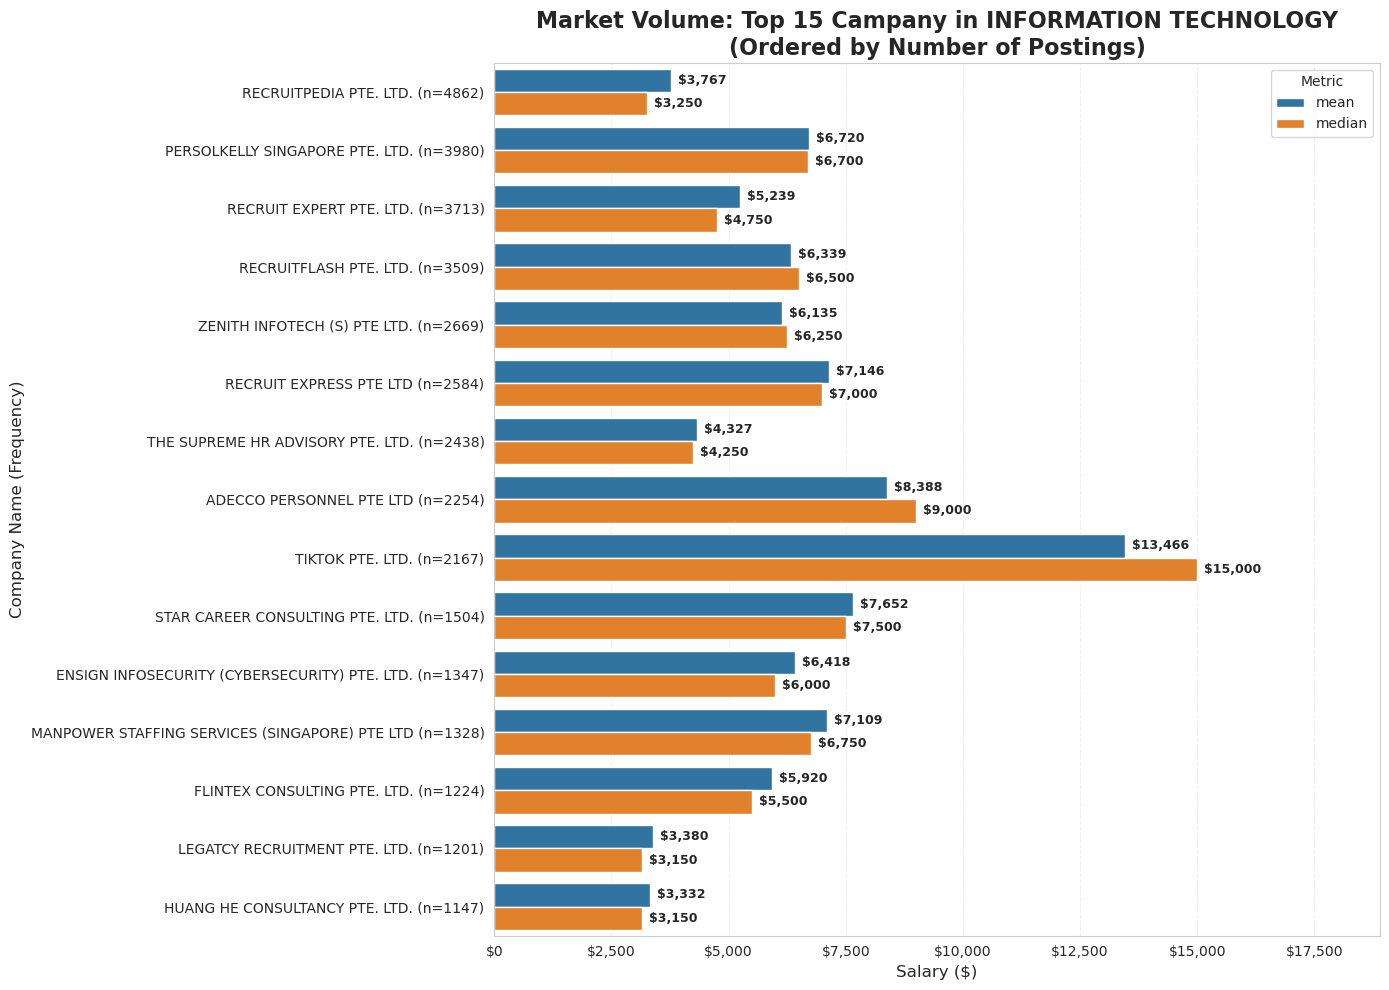

In [67]:
# 6.5 Visualize the average salary and median salary across Company Name (To rank the Top 15 Company Name based on posting count) for a specific job category.

# 1. Configuration
category_text_input = 'Information Technology' 

# 2. Filter by Category
# (Assuming df_cleaned and target_col are defined as in previous steps)
industry_df = df_cleaned[
    df_cleaned['category_text'].str.contains(category_text_input, case=False, na=False)
].copy()

# 3. Calculate Stats
salary_stats = industry_df.groupby("postedCompany_name")["average_salary"].agg(['mean', 'median', 'count'])

# 4. PRIMARY FILTER & SORT: Min Count 5, then sort by COUNT (Frequency)
# We take the head(15) based on popularity, not price
salary_stats = salary_stats[salary_stats['count'] >= 5]
top_15_by_count = salary_stats.sort_values(by='count', ascending=False).head(15)

# 5. Prepare for Visualization
df_plot = top_15_by_count.reset_index().melt(
    id_vars=['postedCompany_name', 'count'], 
    value_vars=['mean', 'median'], 
    var_name='Metric', 
    value_name='Salary'
)

# 6. Create the Visualization
plt.figure(figsize=(14, 10))
ax = sns.barplot(
    data=df_plot, 
    x='Salary', 
    y='postedCompany_name', 
    hue='Metric', 
    palette=['#1f77b4', '#ff7f0e']
)

# 7. Add Count (n) labels to the Y-axis
new_labels = [f"{t} (n={int(top_15_by_count.loc[t, 'count'])})" for t in top_15_by_count.index]
ax.set_yticklabels(new_labels)

# 8. Add Data Labels (Currency)
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', padding=5, fontweight='bold', fontsize=9)

# Formatting
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.title(f"Market Volume: Top 15 Campany in {category_text_input.upper()}\n(Ordered by Number of Postings)", 
          fontweight='bold', fontsize=16)
plt.xlabel("Salary ($)", fontsize=12)
plt.ylabel("Company Name (Frequency)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
ax.set_xlim(right=ax.get_xlim()[1] * 1.2)

plt.tight_layout()
plt.show()

**Activities 8:** Job Market Dynamics: Demand, Salary & Post Efficiency by Category and Role
Build a Dashboard to show the relationship and interaction by job categories, job title, employment types

In [ ]:
# 8.1. Create a Dashboard with a bubble plot to show the relationship and interaction using Tableau or Power BI. (in-progress)
# X axis: average salary
# y axis: minimumYearsExperience 

# color: position level
# bubble size: totalNumberJobApplication
# filters: job categories, job title, employment types
# reference line: average minimum years of experience & average of average salary


**Activities 9** Regress analaysis to understand drivers (in-porgress)

#9.1 Regression model 1: 
Dependent variable: Total Job Applications
Predictors: Views, Salary, Position Level, Experience, Repost Count

#9.2 Regression model 2:
Dependent variable: Average Salary
Predictors: minimumYearsExperience, pos_level_num, and metadata_repostCount
import statsmodels.api as sm

1. Define our Independent Variables (X) and Dependent Variable (y)
We include a constant (intercept) so the model doesn't assume salary is $0 at 0 experience
X = df_cleaned[['minimumYearsExperience', 'pos_level_num', 'metadata_repostCount']]
X = sm.add_constant(X) 
y = df_cleaned['average_salary']

2. Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

3. Print the results
print(model.summary())

10.1 Predict High Application Jobs (Classification)